## 读入数据并使用随机森林筛选特征重要性

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# df=pd.read_excel(r'..\data\雅砻江MinMax归一化后.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江原始值.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江数据去除缺失值.xlsx')
df1=pd.read_excel(r'..\data\88项环流指数.xlsx')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df1.shape

(708, 85)

In [3]:
df1.head()

时间  北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  \
0  195301      0.000      0.000            0.000       0.000       0.000   
1  195302      2.740      0.000            0.000       2.740       0.000   
2  195303      0.000      0.000            0.000       0.000       0.000   
3  195304      0.875      0.000            0.000       0.875       0.000   
4  195305      4.612      1.771            2.443       0.658       1.364   

   北美副高面积指数   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  ...  赤道中东太平洋200hPa纬向风指数  \
0        0.0       0.000        0.000       0.000  ...              12.351   
1        0.0       0.000        0.000       2.740  ...              11.133   
2        0.0       0.000        0.000       0.000  ...               4.015   
3        0.0       0.000        0.000       0.875  ...              -2.021   
4        0.0       0.524        0.821       2.169  ...              -2.325   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0           0.097          10.948          11.931             23   
1           2.145           8.894           7.865             15   
2          -0.104           9.832           8.503              9   
3           2.215           8.854           7.235             30   
4           1.484           7.650           7.522             25   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               8       189      403      502    583.0  
1              13       173      373      468    495.0  
2              22       199      358      449    487.0  
3               0       266      436      535    650.0  
4               6       417      610      729    730.0  

[5 rows x 85 columns]

In [4]:
df=df1.iloc[:,1:]
df.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0      0.000      0.000            0.000       0.000       0.000        0.0   
1      2.740      0.000            0.000       2.740       0.000        0.0   
2      0.000      0.000            0.000       0.000       0.000        0.0   
3      0.875      0.000            0.000       0.875       0.000        0.0   
4      4.612      1.771            2.443       0.658       1.364        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  赤道中东太平洋200hPa纬向风指数  \
0       0.000        0.000       0.000       0.000  ...              12.351   
1       0.000        0.000       2.740      37.332  ...              11.133   
2       0.000        0.000       0.000       0.000  ...               4.015   
3       0.000        0.000       0.875      10.017  ...              -2.021   
4       0.524        0.821       2.169      52.461  ...              -2.325   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0           0.097          10.948          11.931             23   
1           2.145           8.894           7.865             15   
2          -0.104           9.832           8.503              9   
3           2.215           8.854           7.235             30   
4           1.484           7.650           7.522             25   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               8       189      403      502    583.0  
1              13       173      373      468    495.0  
2              22       199      358      449    487.0  
3               0       266      436      535    650.0  
4               6       417      610      729    730.0  

[5 rows x 84 columns]

## 画图
把基本的趋势画出来

<Axes: >

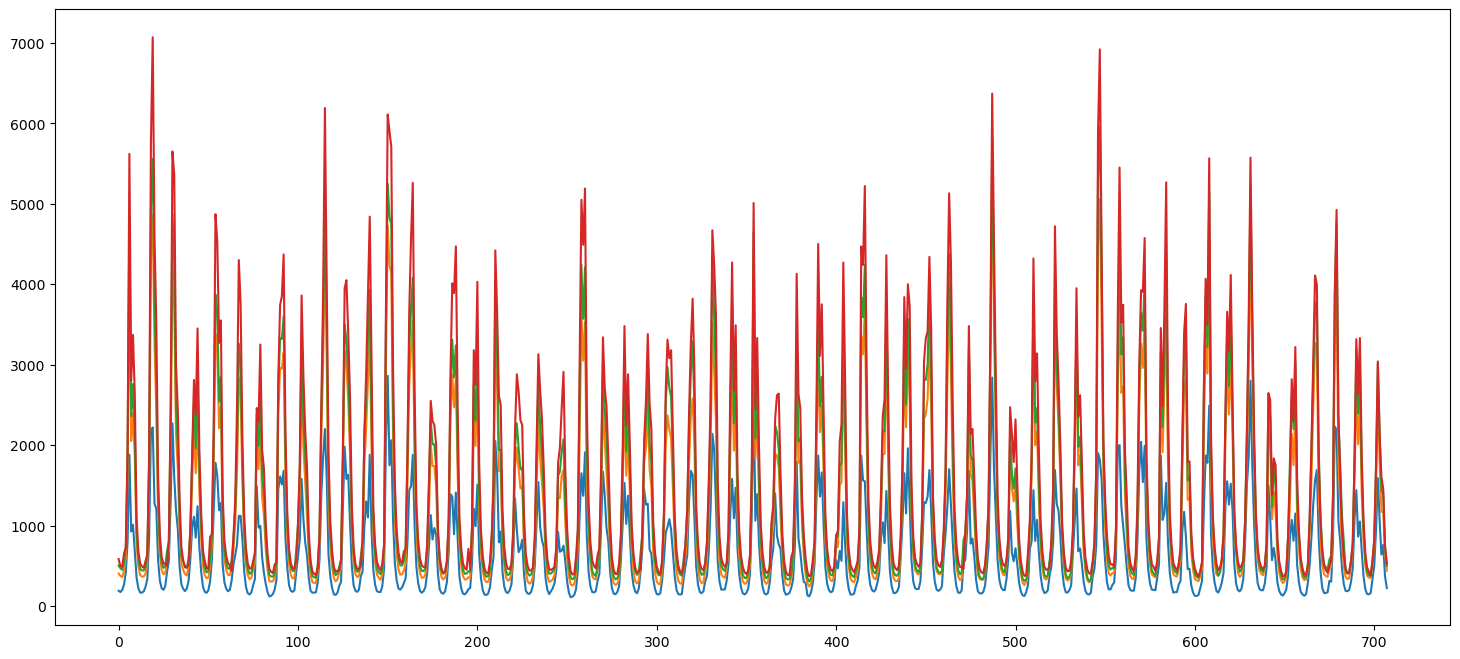

In [15]:
df['两河口月平均流量'].plot(figsize=(18,8))
df['锦屏月平均流量'].plot()

df['官地月平均流量'].plot()
df['二滩月平均流量'].plot()


# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (18, 8)) 
# plt.plot(df1['时间'],df['两河口月平均流量'])
# plt.plot(df1['时间'],df['锦屏月平均流量'])
# plt.plot(df1['时间'],df['官地月平均流量'])
# plt.plot(df1['时间'],df['二滩月平均流量'])

In [89]:
# 此处进行全数据归一化
#注意sklearn归一化后，列名丢失了。
MMScaler=MinMaxScaler()
dfs=MMScaler.fit_transform(df)

dfs=pd.DataFrame(dfs)

#把列名复制回来
dfs.columns=df.columns
# len(dfs.columns),len(df.columns)
dfs.head()

# 另一种列名回来方法
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
# target = iris.target

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0   0.000000   0.000000         0.000000    0.000000    0.000000        0.0   
1   0.031228   0.000000         0.000000    0.157934    0.000000        0.0   
2   0.000000   0.000000         0.000000    0.000000    0.000000        0.0   
3   0.009972   0.000000         0.000000    0.050435    0.000000        0.0   
4   0.052563   0.075122         0.045568    0.037927    0.079275        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  赤道中东太平洋200hPa纬向风指数  \
0    0.000000     0.000000    0.000000    0.000000  ...            0.538569   
1    0.000000     0.000000    0.077863    0.012356  ...            0.509660   
2    0.000000     0.000000    0.000000    0.000000  ...            0.340715   
3    0.000000     0.000000    0.024865    0.003315  ...            0.197451   
4    0.042688     0.025932    0.061637    0.017364  ...            0.190235   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0        0.393664        0.765436        0.685869       0.703704   
1        0.546329        0.648977        0.427053       0.407407   
2        0.378681        0.702160        0.467664       0.185185   
3        0.551547        0.646709        0.386951       0.962963   
4        0.497056        0.578443        0.405220       0.777778   

   北大西洋-欧洲环流型C型指数  两河口月平均流量   锦屏月平均流量   官地月平均流量   二滩月平均流量  
0        0.307692  0.029433  0.030552  0.035240  0.032513  
1        0.500000  0.023619  0.024823  0.029219  0.019389  
2        0.846154  0.033067  0.021959  0.025854  0.018195  
3        0.000000  0.057413  0.036853  0.041084  0.042506  
4        0.230769  0.112282  0.070078  0.075438  0.054437  

[5 rows x 84 columns]

In [90]:
# df_X=df.iloc[:,:-4]
# df_y1=df.iloc[:,-1]
# df_y2=df.iloc[:,-2]
# df_y3=df.iloc[:,-3]
# df_y4=df.iloc[:,-4]

df_X=dfs.iloc[:,:-4]
df_y1=dfs.iloc[:,-1]
df_y2=dfs.iloc[:,-2]
df_y3=dfs.iloc[:,-3]
df_y4=dfs.iloc[:,-4]

# df_X.shape,df_y1.shape,df_y2.shape,df_y3.shape,df_y4.shape
df_X.shape,df_y1.shape,df_y2.shape,df_y3.shape,df_y4.shape

((708, 80), (708,), (708,), (708,), (708,))

In [91]:
df_y1.head()

0    0.032513
1    0.019389
2    0.018195
3    0.042506
4    0.054437
Name: 二滩月平均流量, dtype: float64

In [92]:
df_X.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0   0.000000   0.000000         0.000000    0.000000    0.000000        0.0   
1   0.031228   0.000000         0.000000    0.157934    0.000000        0.0   
2   0.000000   0.000000         0.000000    0.000000    0.000000        0.0   
3   0.009972   0.000000         0.000000    0.050435    0.000000        0.0   
4   0.052563   0.075122         0.045568    0.037927    0.079275        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  极地-欧亚遥相关型指数  \
0    0.000000     0.000000    0.000000    0.000000  ...     0.500000   
1    0.000000     0.000000    0.077863    0.012356  ...     0.739847   
2    0.000000     0.000000    0.000000    0.000000  ...     0.851341   
3    0.000000     0.000000    0.024865    0.003315  ...     0.462835   
4    0.042688     0.025932    0.061637    0.017364  ...     0.379693   

   斯堪的纳维亚遥相关型指数  30hPa纬向风指数  50hPa纬向风指数  赤道中东太平洋200hPa纬向风指数  850hPa西太平洋信风指数  \
0      0.398586    0.458245    0.362921            0.538569        0.393664   
1      0.370310    0.444916    0.319195            0.509660        0.546329   
2      0.284394    0.532670    0.435855            0.340715        0.378681   
3      0.293094    0.653827    0.608220            0.197451        0.551547   
4      0.395324    0.700669    0.687888            0.190235        0.497056   

   850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  北大西洋-欧洲环流型C型指数  
0        0.765436        0.685869       0.703704        0.307692  
1        0.648977        0.427053       0.407407        0.500000  
2        0.702160        0.467664       0.185185        0.846154  
3        0.646709        0.386951       0.962963        0.000000  
4        0.578443        0.405220       0.777778        0.230769  

[5 rows x 80 columns]

In [93]:
df_y1.head()

0    0.032513
1    0.019389
2    0.018195
3    0.042506
4    0.054437
Name: 二滩月平均流量, dtype: float64

In [94]:
'''
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 30,
    'num_round': 360,
    'max_depth':8,
    'learning_rate': 0.01,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 12
}
lgb_train = lgb.Dataset(train.drop(target, 1), train[target])
model = lgb.train(lgb_params, lgb_train)
# 部分参考链接：https://blog.csdn.net/m0_37477175/article/details/80567010
'''


rfr=RandomForestRegressor(random_state=34)

rfr.fit(df_X,df_y1)
rfr.score(df_X,df_y1)

0.9721564956201298

In [95]:
feature_importance=rfr.feature_importances_

features = pd.DataFrame(sorted(zip(feature_importance,df_X.columns),reverse=True))

features

0                   1
0   0.329688         北半球副高脊线位置指数
1   0.270642        北太平洋副高脊线位置指数
2   0.053478        北太平洋副高北界位置指数
3   0.050280  北非-北大西洋-北美副高脊线位置指数
4   0.045829          北非副高脊线位置指数
..       ...                 ...
75  0.000497           北非副高强度指数 
76  0.000488          北大西洋副高强度指数
77  0.000314    北非-北大西洋-北美副高强度指数
78  0.000264         北美大西洋副高面积指数
79  0.000046        热带-北半球遥相关型指数

[80 rows x 2 columns]

In [98]:
features.head()

0                   1
0  0.329688         北半球副高脊线位置指数
1  0.270642        北太平洋副高脊线位置指数
2  0.053478        北太平洋副高北界位置指数
3  0.050280  北非-北大西洋-北美副高脊线位置指数
4  0.045829          北非副高脊线位置指数

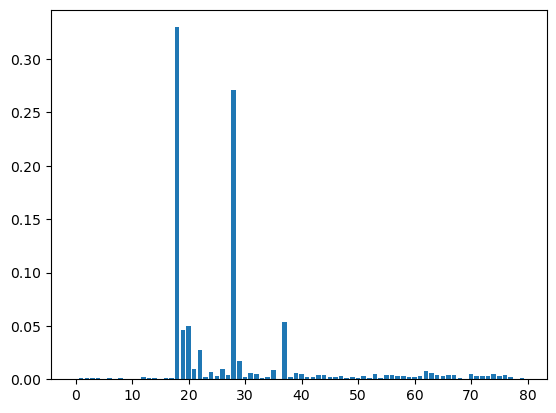

In [99]:
features.to_excel('..\data\RFimportance_8.xlsx')
from matplotlib import pyplot
# plot
# pyplot.bar(range(len(feature_importance)), feature_importance)
pyplot.bar(range(len(feature_importance)), features)
pyplot.show()

In [ ]:
# Let’s plot the importances (chart will be easier to interpret than values).
# 让我们来画出重要性(图表比值更容易解释)。
# To have an even better chart, let’s sort the features, and plot again:
# 为了获得更好的图表，让我们对特征进行排序，然后再次绘图：

sorted_idx = rfr.feature_importances_.argsort()

# plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])

plt.barh(titles1[sorted_idx], rfr.feature_importances_[sorted_idx])#此处如果使用未经转换为numpy array的原titles列表，则会提示：
#TypeError: only integer scalar arrays can be converted to a scalar index：只有整数标量数组可以转换为标量索引

plt.xlabel("Random Forest Feature Importance")

In [100]:
import pandas as pd
import xgboost as xgb 

xgb_rfr = xgb.XGBRFRegressor()

In [101]:
import pandas as pd
import xgboost as xgb 

xgb_rfr = xgb.XGBRFRegressor()

xgb_rfr1=xgb.XGBRegressor(max_depth=5,
                        learning_rate=0.06,
                        n_estimators=160,
                        objective='reg:linear', # 此默认参数与 XGBClassifier 不同
                        booster='gbtree',
                        gamma=0,
                        min_child_weight=1,
                        subsample=1,
                        colsample_bytree=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        random_state=0)


xgb_m = xgb_rfr.fit(df_X, df_y1)
xgb_m1 = xgb_rfr.fit(df_X, df_y1)
a=xgb_m.feature_importances_
a1=xgb_m.feature_importances_
features1 = pd.DataFrame(sorted(zip(a,df_X.columns),reverse=True))

features1

C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0                   1
0   0.216457        北太平洋副高脊线位置指数
1   0.211345         北半球副高脊线位置指数
2   0.114551         北半球副高北界位置指数
3   0.058796        北太平洋副高北界位置指数
4   0.047722  北非-北大西洋-北美副高脊线位置指数
..       ...                 ...
75  0.000757      北大西洋-欧洲环流型C型指数
76  0.000739       北半球极涡中心纬向位置指数
77  0.000629          西太平洋副高面积指数
78  0.000393           北半球副高面积指数
79  0.000347        热带-北半球遥相关型指数

[80 rows x 2 columns]

In [102]:
features2 = pd.DataFrame(sorted(zip(a,df_X.columns),reverse=True))
features2.to_excel('..\data\XGBRFimportance_9.xlsx')

In [103]:
features2

0                   1
0   0.216457        北太平洋副高脊线位置指数
1   0.211345         北半球副高脊线位置指数
2   0.114551         北半球副高北界位置指数
3   0.058796        北太平洋副高北界位置指数
4   0.047722  北非-北大西洋-北美副高脊线位置指数
..       ...                 ...
75  0.000757      北大西洋-欧洲环流型C型指数
76  0.000739       北半球极涡中心纬向位置指数
77  0.000629          西太平洋副高面积指数
78  0.000393           北半球副高面积指数
79  0.000347        热带-北半球遥相关型指数

[80 rows x 2 columns]

In [104]:
features1.to_excel('..\data\XGBRFimportance_10.xlsx')

In [105]:
import pandas as pd
from sklearn.datasets import load_iris
import xgboost as xgb 

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
target = iris.target

xgb_model = xgb.XGBClassifier()
clf = xgb_model.fit(df.values, target)
a=clf.feature_importances_
features = pd.DataFrame(sorted(zip(a,df.columns),reverse=True))

[13:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

df_delay_corr = pd.read_excel(r'..\data\不同滞后相关性.xlsx')
df_delay_corr.head()

皮尔逊相关性           大气环流指数     时滞1个月     时滞2个月     时滞3个月     时滞4个月     时滞5个月  \
0       1        北半球副高面积指数  0.638736  0.406616  0.085256 -0.221226 -0.439844   
1       2         北非副高面积指数  0.677477  0.476961  0.167061 -0.141270 -0.394528   
2       3  北非-大西洋-北美副高面积指数  0.686782  0.452338  0.110609 -0.212278 -0.445053   
3       4       西太平洋副高面积指数  0.295203  0.140073 -0.023424 -0.195713 -0.323491   
4       5       东太平洋副高面积指数  0.483590  0.278849  0.031491 -0.196350 -0.333848   

      时滞6个月     时滞7个月     时滞8个月     时滞9个月    时滞10个月    时滞11个月    时滞12个月  
0 -0.540040 -0.540163 -0.440323 -0.217967  0.121303  0.454054  0.656688  
1 -0.534003 -0.564272 -0.488415 -0.275485  0.067485  0.390357  0.620364  
2 -0.560290 -0.574654 -0.488963 -0.263725  0.102502  0.465222  0.690713  
3 -0.349543 -0.278661 -0.125082  0.054995  0.202970  0.278487  0.337660  
4 -0.387553 -0.386982 -0.328969 -0.185961  0.066004  0.369526  0.529777

In [20]:
df_delay_corr1=df_delay_corr.iloc[:,1:]
df_delay_corr1.head()

大气环流指数     时滞1个月     时滞2个月     时滞3个月     时滞4个月     时滞5个月  \
0        北半球副高面积指数  0.638736  0.406616  0.085256 -0.221226 -0.439844   
1         北非副高面积指数  0.677477  0.476961  0.167061 -0.141270 -0.394528   
2  北非-大西洋-北美副高面积指数  0.686782  0.452338  0.110609 -0.212278 -0.445053   
3       西太平洋副高面积指数  0.295203  0.140073 -0.023424 -0.195713 -0.323491   
4       东太平洋副高面积指数  0.483590  0.278849  0.031491 -0.196350 -0.333848   

      时滞6个月     时滞7个月     时滞8个月     时滞9个月    时滞10个月    时滞11个月    时滞12个月  
0 -0.540040 -0.540163 -0.440323 -0.217967  0.121303  0.454054  0.656688  
1 -0.534003 -0.564272 -0.488415 -0.275485  0.067485  0.390357  0.620364  
2 -0.560290 -0.574654 -0.488963 -0.263725  0.102502  0.465222  0.690713  
3 -0.349543 -0.278661 -0.125082  0.054995  0.202970  0.278487  0.337660  
4 -0.387553 -0.386982 -0.328969 -0.185961  0.066004  0.369526  0.529777

<Axes: >

C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from current font.
  func(*args, **kwargs)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  func(*args, **kwargs)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LiJintao\.conda\envs\dl

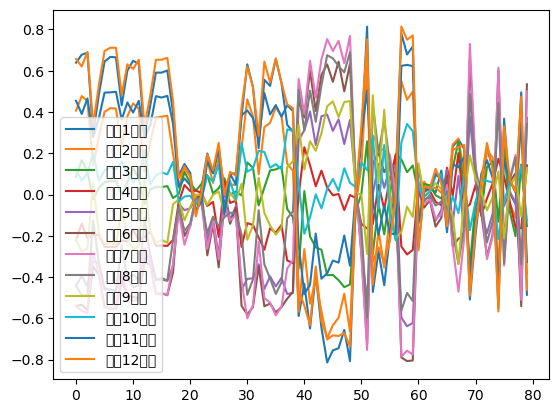

In [21]:
df_delay_corr1.plot()

In [24]:
df_delay_corr1=df_delay_corr1.iloc[:,1:]
df_delay_corr1

时滞1个月     时滞2个月     时滞3个月     时滞4个月     时滞5个月     时滞6个月     时滞7个月  \
0   0.638736  0.406616  0.085256 -0.221226 -0.439844 -0.540040 -0.540163   
1   0.677477  0.476961  0.167061 -0.141270 -0.394528 -0.534003 -0.564272   
2   0.686782  0.452338  0.110609 -0.212278 -0.445053 -0.560290 -0.574654   
3   0.295203  0.140073 -0.023424 -0.195713 -0.323491 -0.349543 -0.278661   
4   0.483590  0.278849  0.031491 -0.196350 -0.333848 -0.387553 -0.386982   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.367411  0.330501  0.224037  0.083635 -0.055128 -0.232976 -0.344113   
76  0.005988 -0.043416 -0.082049 -0.036662  0.014781  0.060701  0.076823   
77 -0.045503 -0.112841 -0.201614 -0.159005 -0.040100  0.102346  0.191266   
78  0.495018  0.392633  0.145077 -0.163858 -0.414614 -0.541232 -0.511045   
79 -0.485899 -0.383860 -0.153437  0.140918  0.371573  0.534190  0.499462   

       时滞8个月     时滞9个月    时滞10个月    时滞11个月    时滞12个月  
0  -0.440323 -0.217967  0.121303  0.454054  0.656688  
1  -0.488415 -0.275485  0.067485  0.390357  0.620364  
2  -0.488963 -0.263725  0.102502  0.465222  0.690713  
3  -0.125082  0.054995  0.202970  0.278487  0.337660  
4  -0.328969 -0.185961  0.066004  0.369526  0.529777  
..       ...       ...       ...       ...       ...  
75 -0.333332 -0.213293 -0.032664  0.167182  0.326395  
76  0.067110  0.040762  0.055880  0.068394  0.072246  
77  0.179916  0.087242  0.028656  0.010134  0.014647  
78 -0.338370 -0.105680  0.137920  0.351917  0.474316  
79  0.343388  0.128325 -0.125593 -0.327565 -0.461143  

[80 rows x 12 columns]

C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.draw()
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from current font.
  fig.canvas.draw()
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.draw()
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.draw()
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\IPython\core\pylabt

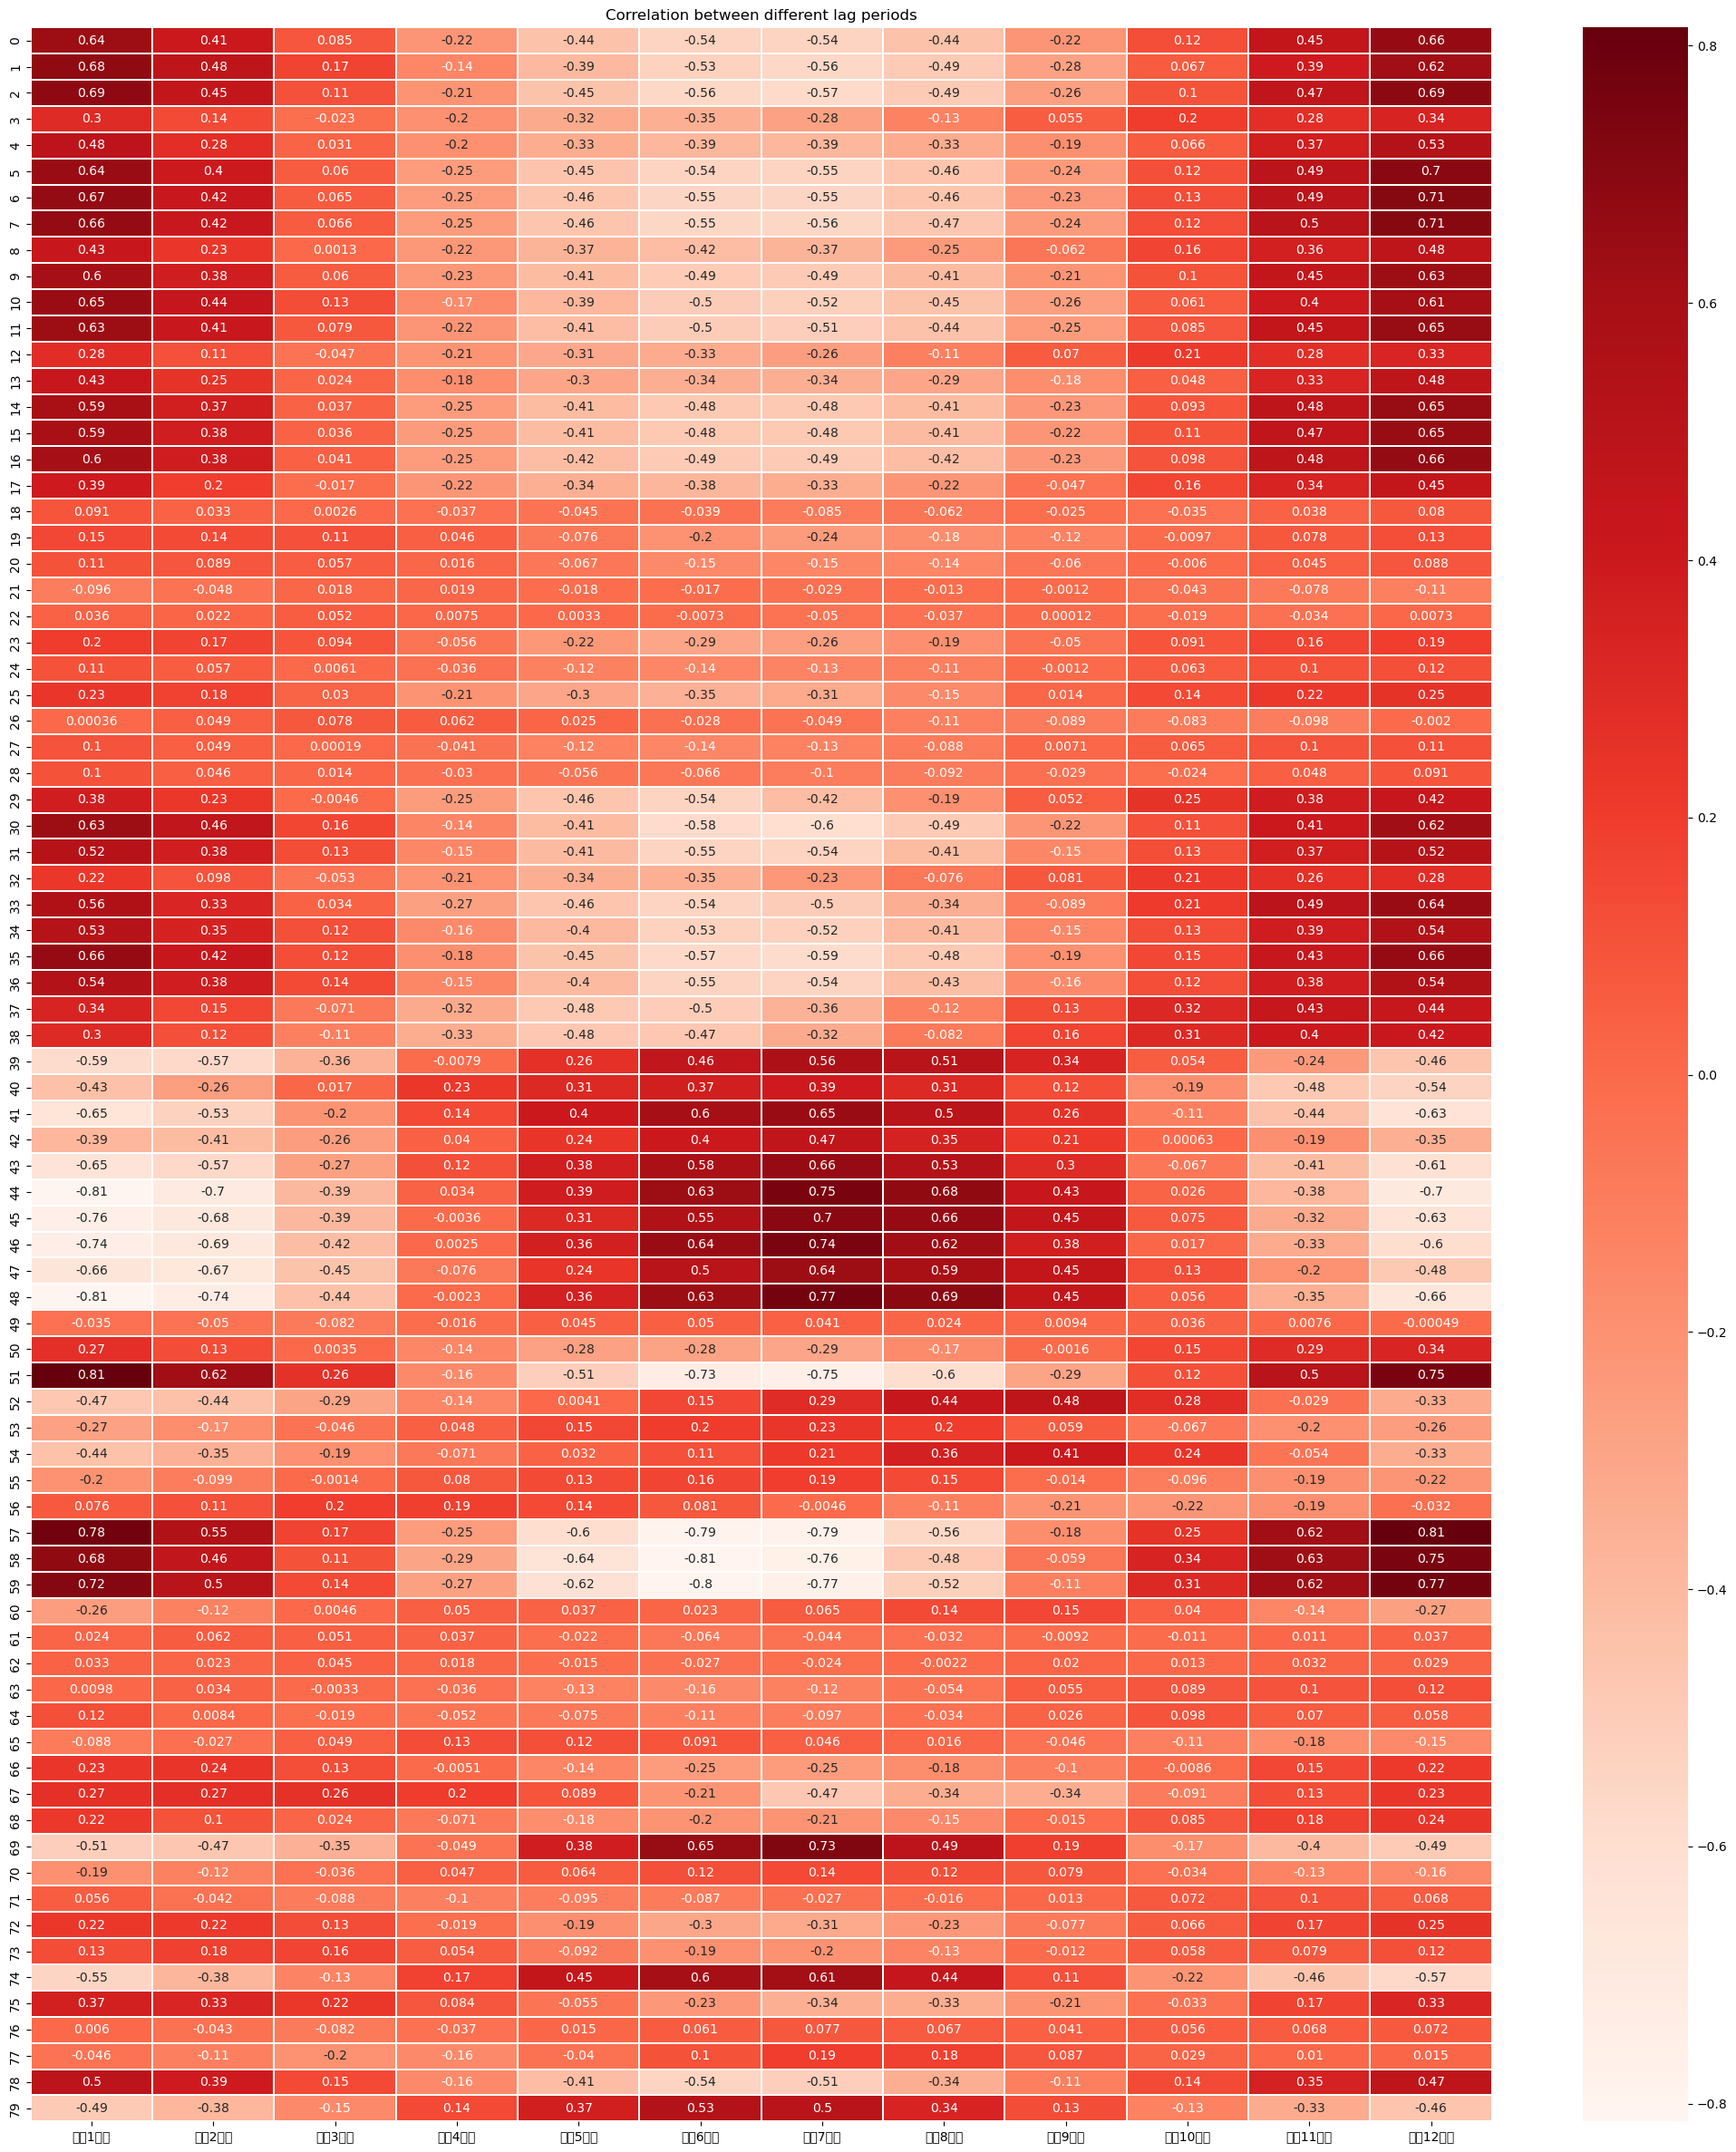

C:\Users\LiJintao\AppData\Local\Temp\ipykernel_93676\1306077264.py:14: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')
C:\Users\LiJintao\AppData\Local\Temp\ipykernel_93676\1306077264.py:14: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from current font.
  f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')
C:\Users\LiJintao\AppData\Local\Temp\ipykernel_93676\1306077264.py:14: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')
C:\Users\LiJintao\AppData\Local\Temp\ipykernel_93676\1306077264.py:14: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')
C:\Users\LiJintao\AppData\Local\Temp\ipykernel_93676\1306077264.py:14: UserWarning: Glyph 26102 (\N{CJK UNIF

In [27]:
import matplotlib.pyplot as plt

f, ax= plt.subplots(figsize = (26, 30))

# corr = data.corr()
# print(corr)
sns.heatmap(df_delay_corr1,cmap='Reds', linewidths = 0.05, ax = ax, annot=True)#如果annot=False则方格内没字；默认是False.
 
# 设置Axes的标题
# ax.set_title('Correlation between features')
ax.set_title('Correlation between different lag periods')
plt.show()
plt.close()
f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')

In [ ]:
## 

In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(15.0,8.0)
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
# plt.rcParams['font.family']='simhei'
# plt.rcParams['font.family']=['sans-serif']
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示

# from matplotlib.font_manager import FontProperties
# fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import warnings

# df=pd.read_excel(r'..\data\雅砻江MinMax归一化后.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江原始值.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江数据去除缺失值.xlsx')
# df1=pd.read_excel(r'..\data\88项环流指数.xlsx')
df1=pd.read_excel(r'..\data\滞后一个月数据.xlsx',sheet_name='滞后一个月80项')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df1.head()

时间  北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  \
0  195212      0.000        0.0              0.0       0.000         0.0   
1  195301      0.000        0.0              0.0       0.000         0.0   
2  195302      2.740        0.0              0.0       2.740         0.0   
3  195303      0.000        0.0              0.0       0.000         0.0   
4  195304      0.875        0.0              0.0       0.875         0.0   

   北美副高面积指数   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  ...  赤道中东太平洋200hPa纬向风指数  \
0        0.0         0.0          0.0       0.000  ...              11.904   
1        0.0         0.0          0.0       0.000  ...              12.351   
2        0.0         0.0          0.0       2.740  ...              11.133   
3        0.0         0.0          0.0       0.000  ...               4.015   
4        0.0         0.0          0.0       0.875  ...              -2.021   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0          -4.472          10.599          11.981             28   
1           0.097          10.948          11.931             23   
2           2.145           8.894           7.865             15   
3          -0.104           9.832           8.503              9   
4           2.215           8.854           7.235             30   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               3       189      403      502    583.0  
1               8       173      373      468    495.0  
2              13       199      358      449    487.0  
3              22       266      436      535    650.0  
4               0       417      610      729    730.0  

[5 rows x 85 columns]

In [3]:
df=df1.iloc[:,1:]
df.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0      0.000        0.0              0.0       0.000         0.0        0.0   
1      0.000        0.0              0.0       0.000         0.0        0.0   
2      2.740        0.0              0.0       2.740         0.0        0.0   
3      0.000        0.0              0.0       0.000         0.0        0.0   
4      0.875        0.0              0.0       0.875         0.0        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  赤道中东太平洋200hPa纬向风指数  \
0         0.0          0.0       0.000       0.000  ...              11.904   
1         0.0          0.0       0.000       0.000  ...              12.351   
2         0.0          0.0       2.740      37.332  ...              11.133   
3         0.0          0.0       0.000       0.000  ...               4.015   
4         0.0          0.0       0.875      10.017  ...              -2.021   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0          -4.472          10.599          11.981             28   
1           0.097          10.948          11.931             23   
2           2.145           8.894           7.865             15   
3          -0.104           9.832           8.503              9   
4           2.215           8.854           7.235             30   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               3       189      403      502    583.0  
1               8       173      373      468    495.0  
2              13       199      358      449    487.0  
3              22       266      436      535    650.0  
4               0       417      610      729    730.0  

[5 rows x 84 columns]

## 画图
把基本的趋势画出来

<Axes: >

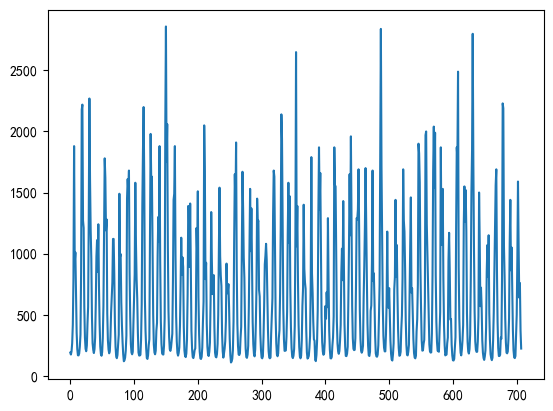

In [4]:
df['两河口月平均流量'].plot()#默认是kind="line"
# df['两河口月平均流量'].plot(kind="line")#默认是kind="line"
# df['锦屏月平均流量'].plot()

# df['官地月平均流量'].plot()
# df['二滩月平均流量'].plot()


# import matplotlib.pyplot as plt

# plt.plot(df1['时间'],df['两河口月平均流量'])
# plt.plot(df1['时间'],df['锦屏月平均流量'])
# plt.plot(df1['时间'],df['官地月平均流量'])
# plt.plot(df1['时间'],df['二滩月平均流量'])

In [5]:
# 此处进行全数据归一化
#注意sklearn归一化后，列名丢失了。

# MMScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
# MMScaler1=MinMaxScaler((-1,1))
# StdScaler=StandardScaler()

# 整体归一化
# dfs=MMScaler.fit_transform(df)
# dfs1=StdScaler.fit_transform(df)

# X和y分开归一化
MMXScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy1Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy2Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy3Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy4Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间

# 分开归一化

df_X=df.iloc[:,:-4]# 执行此句后，type(df_X)输出pandas.core.frame.DataFrame
df_y1=df.iloc[:,-4]# 执行此句后，type(df_y1)输出pandas.core.series.Series
df_y2=df.iloc[:,-3]
#df_y1=df.iloc[:,-1:-3] # 执行此句后，type(df_X)输出pandas.core.frame.DataFrame,可以看到只要从原pandas的df中提取大于一列，那么就
#是frame.DataFrame；如果只提取一列，那么就默认是pandas.core.series.Series。

df_y3=df.iloc[:,-2]
df_y4=df.iloc[:,-1]

# df_y1.shape#(708,)

# type(df_y1) #输出pandas.core.series.Series
# type(df_X) #输出pandas.core.frame.DataFrame

#由于同df_y1=df.iloc[:,-1]得到的df_y1,df_y2,df_y3,df_y4都是单独一列一列提出来的，所以此处要把其转换回去，转换成pandas的DataFrame。
# 否则没法使用逆向函数MMXScaler.fit_transform()。
df_y1,df_y2,df_y3,df_y4=pd.DataFrame(df_y1),pd.DataFrame(df_y2),pd.DataFrame(df_y3),pd.DataFrame(df_y4)

dfM_X=MMXScaler.fit_transform(df_X)
dfM_y1=MMy1Scaler.fit_transform(df_y1)
dfM_y2=MMy2Scaler.fit_transform(df_y2)
dfM_y3=MMy3Scaler.fit_transform(df_y3)
dfM_y4=MMy4Scaler.fit_transform(df_y4)

print(dfM_X.shape,dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape)
print(type(dfM_X),type(dfM_y1),type(dfM_y2),type(dfM_y3),type(dfM_y4))

(708, 80) (708, 1) (708, 1) (708, 1) (708, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# dfs=MMScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列归一化
# dfs1=StdScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列标准化

#把列名复制回来前需要先把，归一化/标准化后的数据转化成Pandas的DataFrame数据
# dfs=pd.DataFrame(dfs)
# dfs1=pd.DataFrame(dfs1)

dfM_X,dfM_y1,dfM_y2,dfM_y3,dfM_y4=pd.DataFrame(dfM_X),pd.DataFrame(dfM_y1),pd.DataFrame(dfM_y2),pd.DataFrame(dfM_y3),pd.DataFrame(dfM_y4)

#把列名复制回来
# dfs.columns=df.columns
# dfs1.columns=df.columns
dfM_X.columns=df_X.columns
dfM_y1.columns=df_y1.columns
dfM_y2.columns=df_y2.columns
dfM_y3.columns=df_y3.columns
dfM_y4.columns=df_y4.columns

dfM_X.head()

# dfs.columns=df.iloc[:,:-4].columns
# dfs1.columns=df.iloc[:,:-4].columns
# len(dfs.columns),len(df.columns)

# 另一种列名回来方法
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
# target = iris.target


# # 把归一化及标准化后的数据存下来,此处是为了查看下标准化后的数据的正负范围。
# with pd.ExcelWriter(r'..\data\标归化后的数据.xlsx') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# # ExcelWriter也可用于追加到现有的Excel文件中:
# """
# # ExcelWriter也可用于追加到现有的Excel文件中:

# with pd.ExcelWriter(r'..\data\滞后一个月数据.xlsx',mode='a') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# """

# dfs.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0   0.000000        0.0              0.0    0.000000         0.0        0.0   
1   0.000000        0.0              0.0    0.000000         0.0        0.0   
2   0.031228        0.0              0.0    0.157934         0.0        0.0   
3   0.000000        0.0              0.0    0.000000         0.0        0.0   
4   0.009972        0.0              0.0    0.050435         0.0        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  极地-欧亚遥相关型指数  \
0         0.0          0.0    0.000000    0.000000  ...     0.597701   
1         0.0          0.0    0.000000    0.000000  ...     0.500000   
2         0.0          0.0    0.077863    0.012356  ...     0.739847   
3         0.0          0.0    0.000000    0.000000  ...     0.851341   
4         0.0          0.0    0.024865    0.003315  ...     0.462835   

   斯堪的纳维亚遥相关型指数  30hPa纬向风指数  50hPa纬向风指数  赤道中东太平洋200hPa纬向风指数  850hPa西太平洋信风指数  \
0      0.590538    0.552908    0.457455            0.527960        0.053075   
1      0.398586    0.458245    0.362921            0.538569        0.393664   
2      0.370310    0.444916    0.319195            0.509660        0.546329   
3      0.284394    0.532670    0.435855            0.340715        0.378681   
4      0.293094    0.653827    0.608220            0.197451        0.551547   

   850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  北大西洋-欧洲环流型C型指数  
0        0.745648        0.689052       0.888889        0.115385  
1        0.765436        0.685869       0.703704        0.307692  
2        0.648977        0.427053       0.407407        0.500000  
3        0.702160        0.467664       0.185185        0.846154  
4        0.646709        0.386951       0.962963        0.000000  

[5 rows x 80 columns]

In [7]:
dfM_y1.head()

两河口月平均流量
0  0.029433
1  0.023619
2  0.033067
3  0.057413
4  0.112282

In [8]:
MMy1Scaler.inverse_transform(dfM_y1)

array([[ 189.],
       [ 173.],
       [ 199.],
       [ 266.],
       [ 417.],
       [ 801.],
       [1880.],
       [ 926.],
       [1010.],
       [ 687.],
       [ 352.],
       [ 218.],
       [ 167.],
       [ 166.],
       [ 182.],
       [ 238.],
       [ 336.],
       [ 846.],
       [2180.],
       [2220.],
       [1270.],
       [1210.],
       [ 565.],
       [ 312.],
       [ 220.],
       [ 200.],
       [ 247.],
       [ 425.],
       [ 562.],
       [1300.],
       [2270.],
       [1600.],
       [1190.],
       [ 959.],
       [ 483.],
       [ 266.],
       [ 212.],
       [ 185.],
       [ 217.],
       [ 310.],
       [ 590.],
       [ 974.],
       [1110.],
       [ 849.],
       [1240.],
       [ 733.],
       [ 429.],
       [ 240.],
       [ 177.],
       [ 163.],
       [ 193.],
       [ 307.],
       [ 572.],
       [1180.],
       [1780.],
       [1620.],
       [1190.],
       [1280.],
       [ 510.],
       [ 290.],
       [ 214.],
       [ 183.],
       [

In [9]:
'''
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 30,
    'num_round': 360,
    'max_depth':8,
    'learning_rate': 0.01,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 12
}
lgb_train = lgb.Dataset(train.drop(target, 1), train[target])
model = lgb.train(lgb_params, lgb_train)
# 部分参考链接：https://blog.csdn.net/m0_37477175/article/details/80567010
'''


rfr=RandomForestRegressor(random_state=34)

rfr.fit(dfM_X,dfM_y1)
rfr.score(dfM_X,dfM_y1)#打印出拟合优度

C:\Users\LiJintao\AppData\Local\Temp\ipykernel_34716\1084083963.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(dfM_X,dfM_y1)


0.9667861138198782

In [10]:
feature_importance=rfr.feature_importances_

features = pd.DataFrame(sorted(zip(feature_importance,df_X.columns),reverse=True))

features

0              1
0   0.423122    北半球极涡中心强度指数
1   0.253174      亚洲区极涡强度指数
2   0.047041      北半球极涡强度指数
3   0.029435        东亚槽强度指数
4   0.023833    印度副高脊线位置指数 
..       ...            ...
75  0.000788      太平洋副高强度指数
76  0.000718     北大西洋副高强度指数
77  0.000708     北大西洋副高面积指数
78  0.000653    北美大西洋副高面积指数
79  0.000507  北美-北大西洋副高强度指数

[80 rows x 2 columns]

In [11]:
# with pd.ExcelWriter(r'..\data\FeatureImportance.xlsx',mode='a') as writer:
#     features.to_excel(writer,sheet_name='RFImportance_lhk13')
    
# from matplotlib import pyplot
# # plot
# pyplot.bar(range(len(feature_importance)), feature_importance)
# pyplot.show()

## 计算滞后相关性、画图(在另一个ipynb)

## 模型训练和预测
### SVR预测
归一化的方法分别为：MMXScaler, MMy1Scaler, MMy2Scaler, MMy3Scaler, MMy4Scaler  
归一化后的X和y名称：dfM_X, dfM_y1, dfM_y2, dfM_y3, dfM_y4

In [12]:
# 归一化后的X和y名称：dfM_X.shape,dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape

from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# 或另一个例子：https://blog.csdn.net/qq_45856698/article/details/129895492

X1_train,X1_test,y1_train,y1_test=train_test_split(dfM_X,dfM_y1,test_size=0.1,random_state=34,shuffle=False)

X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((637, 80), (71, 80), (637, 1), (71, 1))

In [13]:
y1_train.head() # X_train.head() 

两河口月平均流量
0  0.029433
1  0.023619
2  0.033067
3  0.057413
4  0.112282

In [14]:

# 对划分后的训练集和测试集中的特征变量进行数据标准化
# 由于特征变量的取值范围不尽相同，使用sklearn的StandardScaler类，将训练集和测试集中的所有特征变量进行标准化（即，均值为0，标准差为1）。
# "values.reshape(-1,1)"是将数据中的所有元素按照一列的形式重新排列，其中，-1 表示自动计算行数，1 表示只有一列。
# scaler = StandardScaler()

# scaler.fit(data_train)
# data_train_s=scaler.fit_transform(data_train)#对训练集中的特征变量进行标准化
# data_test_s=scaler.fit_transform(data_test)#对测试集的特征变量进行标准化

# 进行支持向量回归
# 使用sklearn的SVR类分别进行径向核（rbf）、二次多项式核（poly，2）、三次多项式核（poly，3）、S型核进行支持向量回归。
# 使用 fit（）方法对SVR进行估计，在这里使用默认参数”epsilon=0.1“，即SVR的调节参数为0.1。使用score（）方法，计算测试集的拟合优度。

#使用多项式内核进行拟合、预测
svr_poly=SVR(kernel='poly',degree=6)#默认使用径向基函数作为内核kernel='rbf'。
svr_poly.fit(X1_train,y1_train)#模型拟合
print(svr_poly.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。

svr_poly_y1_pred = svr_poly.predict(X1_test)
# model.score(X_test,y1_test) #如果在拟合训练集后，输出训练集的拟合优度可能很高；但是测试集的不会太高，因为并没有拟合测试集。

# 对多项式核函数模型评估
print("对多项式核函数的默认评估值(拟合优度)为：", svr_poly.score(X1_test, y1_test))
print("对多项式核函数的R_Squared值为：", r2_score(y1_test, svr_poly_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对多项式核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_poly_y1_pred.reshape(-1,1))))
print("对多项式核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_poly_y1_pred.reshape(-1,1))))


#使用径向基进行拟合、预测
svr_rbf=SVR(kernel='rbf')#默认使用径向基函数作为内核kernel='rbf'。
svr_rbf.fit(X1_train,y1_train)#模型拟合
print(svr_rbf.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_rbf_y1_pred = svr_rbf.predict(X1_test)

# 对RBF核函数模型评估
print("对RBF核函数的默认评估值(拟合优度)为：", svr_rbf.score(X1_test, y1_test))
print("对RBF核函数的R_Squared值为：", r2_score(y1_test, svr_rbf_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对RBF核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_rbf_y1_pred.reshape(-1,1))))
print("对RBF核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_rbf_y1_pred.reshape(-1,1))))


#使用Linear线性函数进行拟合、预测
svr_lin=SVR(kernel='linear')#默认使用径向基函数作为内核kernel='rbf'。
svr_lin.fit(X1_train,y1_train)#模型拟合
print(svr_lin.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_lin_y1_pred = svr_lin.predict(X1_test)

# 对Linear核函数模型评估
print("对Linear核函数的默认评估值(拟合优度)为：", svr_lin.score(X1_test, y1_test))
print("对Linear核函数的R_Squared值为：", r2_score(y1_test, svr_lin_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对Linear核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_lin_y1_pred.reshape(-1,1))))
print("对Linear核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_lin_y1_pred.reshape(-1,1))))



#使用sigmoid函数进行拟合、预测
svr_sigm=SVR(kernel='sigmoid')#默认使用径向基函数作为内核kernel='rbf'。
svr_sigm.fit(X1_train,y1_train)#模型拟合
print(svr_sigm.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_sigm_y1_pred = svr_sigm.predict(X1_test)

# 对Linear核函数模型评估
print("对sigmoid核函数的默认评估值(拟合优度)为：", svr_sigm.score(X1_test, y1_test))
print("对sigmoid核函数的R_Squared值为：", r2_score(y1_test, svr_sigm_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对sigmoid核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_sigm_y1_pred.reshape(-1,1))))
print("对sigmoid核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_sigm_y1_pred.reshape(-1,1))))

# # 通过对比，我们发现采用S型核效果最好，测试集的拟合优度达到0.7219，故本文采取S型核。由于截至目前，超参数都是选用默认的设置，


0.8840289792536147
对多项式核函数的默认评估值(拟合优度)为： 0.18898206168360376
对多项式核函数的R_Squared值为： 0.18898206168360376
对多项式核函数的均方误差为逆向: 202483.86682916924
对多项式核函数的平均绝对误差为逆向: 323.117421094289
0.8192794929131099
对RBF核函数的默认评估值(拟合优度)为： 0.6339165669639061
对RBF核函数的R_Squared值为： 0.6339165669639061
对RBF核函数的均方误差为逆向: 91398.70476493373
对RBF核函数的平均绝对误差为逆向: 220.5561560297546
0.7621108680086048
对Linear核函数的默认评估值(拟合优度)为： 0.5955288911898711
对Linear核函数的R_Squared值为： 0.5955288911898711
对Linear核函数的均方误差为逆向: 100982.81463733292
对Linear核函数的平均绝对误差为逆向: 245.57319547103467
-9.758523147997
对sigmoid核函数的默认评估值(拟合优度)为： -7.902263637884568
对sigmoid核函数的R_Squared值为： -7.902263637884568
对sigmoid核函数的均方误差为逆向: 2222595.4319500555
对sigmoid核函数的平均绝对误差为逆向: 1210.4616458099824


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

## 筛选后的数据
筛选后的各站点对应的自变量X数据

In [15]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩

rfx_lhk=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_LHK')
rfx_jp=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_JP')
rfx_gd=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_GD')
rfx_et=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_ET')



srax_lhk=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_LHK')
srax_jp=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_JP')
srax_gd=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_GD')
srax_et=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_ET')

# rfx_lhk.head()
rfx_lhk.shape,rfx_jp.shape,rfx_gd.shape,rfx_et.shape,srax_lhk.shape,srax_jp.shape,srax_gd.shape,srax_et.shape

((708, 16),
 (708, 11),
 (708, 10),
 (708, 11),
 (708, 18),
 (708, 15),
 (708, 15),
 (708, 15))

## 此处把所有自变量数据X进行归一化

In [16]:
# 此处进行全数据归一化
#注意sklearn归一化后，列名丢失了。

# MMScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
# MMScaler1=MinMaxScaler((-1,1))
# StdScaler=StandardScaler()

# 整体归一化
# dfs=MMScaler.fit_transform(df)
# dfs1=StdScaler.fit_transform(df)

# X和y分开归一化C
MMrX1Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMrX2Scaler=MinMaxScaler()
MMrX3Scaler=MinMaxScaler()
MMrX4Scaler=MinMaxScaler()

MMsrX1Scaler=MinMaxScaler()
MMsrX2Scaler=MinMaxScaler()
MMsrX3Scaler=MinMaxScaler()
MMsrX4Scaler=MinMaxScaler()


# 分开归一化

# df_X=df.iloc[:,:-4]# 执行此句后，type(df_X)输出pandas.core.frame.DataFrame
# df_y1=df.iloc[:,-4]# 执行此句后，type(df_y1)输出pandas.core.series.Series
# df_y2=df.iloc[:,-3]
#df_y1=df.iloc[:,-1:-3] # 执行此句后，type(df_X)输出pandas.core.frame.DataFrame,可以看到只要从原pandas的df中提取大于一列，那么就
#是frame.DataFrame；如果只提取一列，那么就默认是pandas.core.series.Series。

# df_y3=df.iloc[:,-2]
# df_y4=df.iloc[:,-1]

# df_y1.shape#(708,)

# type(df_y1) #输出pandas.core.series.Series
# type(df_X) #输出pandas.core.frame.DataFrame

#由于同df_y1=df.iloc[:,-1]得到的df_y1,df_y2,df_y3,df_y4都是单独一列一列提出来的，所以此处要把其转换回去，转换成pandas的DataFrame。
# 否则没法使用逆向函数MMXScaler.fit_transform()。
# df_y1,df_y2,df_y3,df_y4=pd.DataFrame(df_y1),pd.DataFrame(df_y2),pd.DataFrame(df_y3),pd.DataFrame(df_y4)

MMrX1=MMrX1Scaler.fit_transform(rfx_lhk)
MMrX2=MMrX2Scaler.fit_transform(rfx_jp)
MMrX3=MMrX3Scaler.fit_transform(rfx_gd)
MMrX4=MMrX4Scaler.fit_transform(rfx_et)

MMsrX1=MMsrX1Scaler.fit_transform(srax_lhk)
MMsrX2=MMsrX2Scaler.fit_transform(srax_jp)
MMsrX3=MMsrX3Scaler.fit_transform(srax_gd)
MMsrX4=MMsrX4Scaler.fit_transform(srax_et)


# dfM_y1=MMy1Scaler.fit_transform(df_y1)
# dfM_y2=MMy2Scaler.fit_transform(df_y2)
# dfM_y3=MMy3Scaler.fit_transform(df_y3)
# dfM_y4=MMy4Scaler.fit_transform(df_y4)

print(MMrX1.shape,MMrX2.shape,MMrX3.shape,MMrX4.shape,MMsrX1.shape,MMsrX2.shape,MMsrX3.shape,MMsrX4.shape)
print(type(MMrX1),type(dfM_y1),type(dfM_y2),type(dfM_y3),type(dfM_y4))

(708, 16) (708, 11) (708, 10) (708, 11) (708, 18) (708, 15) (708, 15) (708, 15)
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [17]:
type(MMrX1),type(dfM_y1),MMrX1.shape

(numpy.ndarray, pandas.core.frame.DataFrame, (708, 16))

In [18]:
df_y1.head()

两河口月平均流量
0       189
1       173
2       199
3       266
4       417

In [19]:
# MMrX1,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。MMrX1是指随机森林RF，MMsrX1是指逐步回归sr


# dfs=MMScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列归一化
# dfs1=StdScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列标准化

#把列名复制回来前需要先把，归一化/标准化后的数据转化成Pandas的DataFrame数据
# dfs=pd.DataFrame(dfs)
# dfs1=pd.DataFrame(dfs1)

MMrX1,MMrX2,MMrX3,MMrX4 = pd.DataFrame(MMrX1),pd.DataFrame(MMrX2),pd.DataFrame(MMrX3),pd.DataFrame(MMrX4)

MMsrX1,MMsrX2,MMsrX3,MMsrX4 = pd.DataFrame(MMsrX1),pd.DataFrame(MMsrX2),pd.DataFrame(MMsrX3),pd.DataFrame(MMsrX4)

# 如果上面没有对各个y进行归一化则不需要下面一行代码
# dfM_y1,dfM_y2,dfM_y3,dfM_y4 = pd.DataFrame(dfM_y1),pd.DataFrame(dfM_y2),pd.DataFrame(dfM_y3),pd.DataFrame(dfM_y4)

#把列名复制回来
# dfs.columns=df.columns
# dfs1.columns=df.columns

MMrX1.columns,MMrX2.columns,MMrX3.columns,MMrX4.columns = rfx_lhk.columns,rfx_jp.columns,rfx_gd.columns,rfx_et.columns

MMsrX1.columns,MMsrX2.columns,MMsrX3.columns,MMsrX4.columns = srax_lhk.columns,srax_jp.columns,srax_gd.columns,srax_et.columns

# # 如果上面没有对各个y进行归一化则不需要下面一块代码
# dfM_y1.columns=df_y1.columns
# dfM_y2.columns=df_y2.columns
# dfM_y3.columns=df_y3.columns
# dfM_y4.columns=df_y4.columns

MMrX1.head(),MMsrX1.head()

# dfs.columns=df.iloc[:,:-4].columns
# dfs1.columns=df.iloc[:,:-4].columns
# len(dfs.columns),len(df.columns)

# 另一种列名回来方法
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
# target = iris.target


# # 把归一化及标准化后的数据存下来,此处是为了查看下标准化后的数据的正负范围。
# with pd.ExcelWriter(r'..\data\标归化后的数据.xlsx') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# # ExcelWriter也可用于追加到现有的Excel文件中:
# """
# # ExcelWriter也可用于追加到现有的Excel文件中:

# with pd.ExcelWriter(r'..\data\滞后一个月数据.xlsx',mode='a') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# """

# dfs.head()

(   北半球极涡中心强度指数  亚洲区极涡强度指数  北半球极涡强度指数   东亚槽强度指数  印度副高脊线位置指数  北美区极涡强度指数  \
 0     0.356286   0.845284   0.745537  0.123353    0.339911   0.382096   
 1     0.225774   0.627801   0.672803  0.138701    0.332250   0.593298   
 2     0.174001   0.728564   0.829997  0.085332    0.387634   0.681356   
 3     0.085716   0.739471   0.688358  0.332829    0.487433   0.519924   
 4     0.492442   0.279346   0.232285  0.361230    0.420231   0.091076   
 
    北大西洋涛动指数  北太平洋遥相关型指数  太平洋-北美遥相关型指数  亚洲纬向环流指数  东大西洋-西俄罗斯遥相关型指数  太平洋区极涡强度指数  \
 0  0.444092    0.000000      0.543772  0.545979         0.352856    0.892267   
 1  0.455591    0.809795      0.532766  0.356916         0.471442    0.641286   
 2  0.568993    0.738231      0.630315  0.332640         0.436108    0.866762   
 3  0.654243    0.671406      0.398699  0.594219         0.711520    0.665748   
 4  0.318398    0.826698      0.668334  0.183864         0.218296    0.376613   
 
    亚洲经向环流指数    南极涛动指数  北大西洋-欧洲区极涡强度指数  赤道中东太平洋200hPa纬向风指数  
 0  0

In [20]:
MMrX1

北半球极涡中心强度指数  亚洲区极涡强度指数  北半球极涡强度指数   东亚槽强度指数  印度副高脊线位置指数  北美区极涡强度指数  \
0       0.356286   0.845284   0.745537  0.123353    0.339911   0.382096   
1       0.225774   0.627801   0.672803  0.138701    0.332250   0.593298   
2       0.174001   0.728564   0.829997  0.085332    0.387634   0.681356   
3       0.085716   0.739471   0.688358  0.332829    0.487433   0.519924   
4       0.492442   0.279346   0.232285  0.361230    0.420231   0.091076   
..           ...        ...        ...       ...         ...        ...   
703     0.990304   0.110758   0.037345  0.940786    0.856832   0.081601   
704     0.945260   0.167171   0.103102  0.945744    0.887507   0.086162   
705     0.590572   0.298506   0.357446  0.754252    0.744763   0.317914   
706     0.454134   0.583756   0.592860  0.590942    0.518334   0.434423   
707     0.367547   0.754223   0.722156  0.394611    0.498403   0.616594   

     北大西洋涛动指数  北太平洋遥相关型指数  太平洋-北美遥相关型指数  亚洲纬向环流指数  东大西洋-西俄罗斯遥相关型指数  \
0    0.444092    0.000000      0.543772  0.545979         0.352856   
1    0.455591    0.809795      0.532766  0.356916         0.471442   
2    0.568993    0.738231      0.630315  0.332640         0.436108   
3    0.654243    0.671406      0.398699  0.594219         0.711520   
4    0.318398    0.826698      0.668334  0.183864         0.218296   
..        ...         ...           ...       ...              ...   
703  0.289849    0.767457      0.418709  0.293029         0.388674   
704  0.229183    0.760979      0.913957  0.443988         0.570668   
705  0.635210    0.747551      0.413707  0.444664         0.330106   
706  0.643140    0.730174      0.598799  0.737173         0.491772   
707  0.749009    0.702844      0.360680  0.709622         0.753630   

     太平洋区极涡强度指数  亚洲经向环流指数    南极涛动指数  北大西洋-欧洲区极涡强度指数  赤道中东太平洋200hPa纬向风指数  
0      0.892267  0.353614  0.116265        0.556930            0.527960  
1      0.641286  0.149037  0.126046        0.589510            0.538569  
2      0.866762  0.615825  0.136804        0.691266            0.509660  
3      0.665748  0.149735  0.281575        0.584095            0.340715  
4      0.376613  0.483394  0.089480        0.262429            0.197451  
..          ...       ...       ...             ...                 ...  
703    0.048627  0.627268  0.455518        0.104779            0.410045  
704    0.134785  0.498744  0.508513        0.196528            0.221281  
705    0.413539  0.596148  0.410215        0.401896            0.283917  
706    0.646806  0.304633  0.755083        0.540268            0.245562  
707    0.700997  0.295841  0.539132        0.530150            0.506931  

[708 rows x 16 columns]

# 以下为两河口的SVR和MLP预测结果等
## 1.SVR预测

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7665243306109922 {'C': 1000, 'epsilon': 100, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 50501.85197462531,训练集r2_score: 0.8373619482766519
训练集mae: 140.72521451478994,训练集mape: 0.2612978369439894
训练集msle: 0.08251462689800443
测试集mse: 68086.95357586228,测试集r2_score: 0.7549879435505709
测试集mae: 169.12021811093695,测试集mape: 0.2931936239790377
测试集msle: 0.11028680823772898


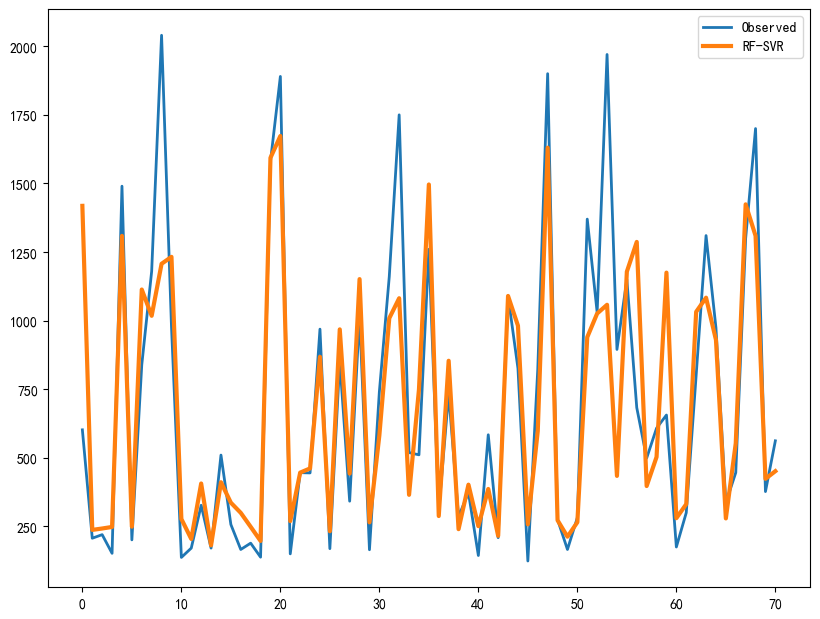

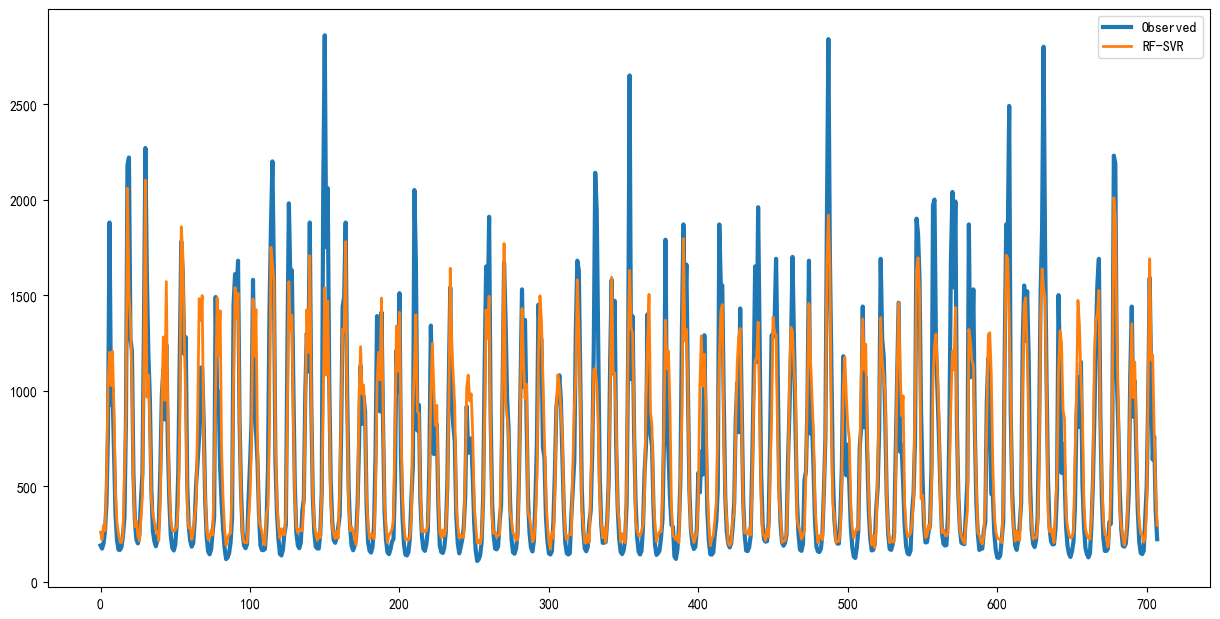

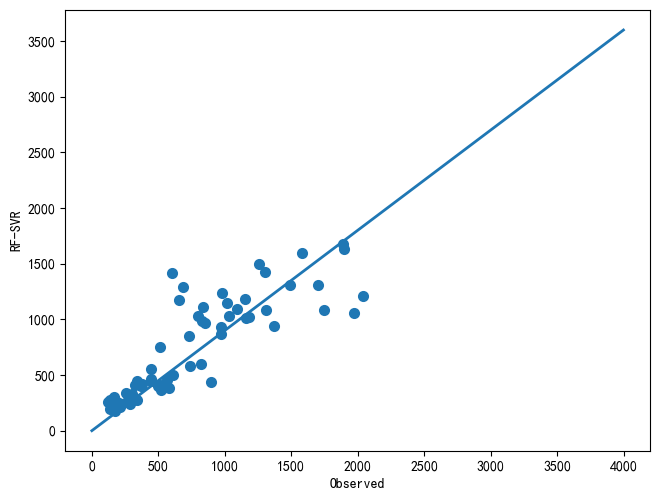

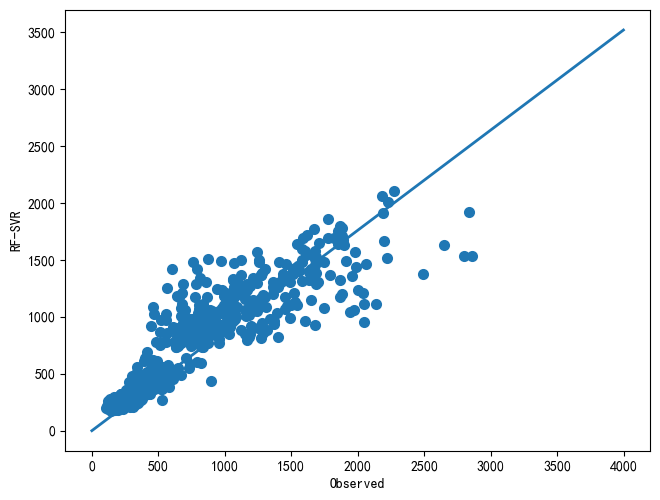

In [21]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMrX1,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集
X1_train,X1_test,y1_train,y1_test=train_test_split(MMrX1,df_y1,test_size=0.1,random_state=34,shuffle=True)
# X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param1=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param1=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
# #     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[0.1,0.5,1,5,10],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.05,0.1,1,10],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[1170,1176,1178,1179,1180,1182,1185,1190,1200,1210],'kernel':['poly','rbf','sigmoid'],'epsilon':[90,101,102,103,104,105,106,107,108,109,110,112,115,120,125,150],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[1179,1180,1190,1200],'kernel':['poly','rbf','sigmoid'],'epsilon':[106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[1000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[15,20,25],'kernel':['linear'], 'epsilon':[10,13,15]}#linear内核不接受“gamma”作为参数；
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr1.fit(X1_train,y1_train)
print(grid_svr1.best_score_, grid_svr1.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred1_train=grid_svr1.predict(X1_train)
svr_pred1_test=grid_svr1.predict(X1_test)
print(f'训练集mse: {mean_squared_error(y1_train,svr_pred1_train)},训练集r2_score: {r2_score(y1_train,svr_pred1_train)}')
print(f'训练集mae: {mean_absolute_error(y1_train,svr_pred1_train)},训练集mape: {mean_absolute_percentage_error(y1_train,svr_pred1_train)}')
print(f'训练集msle: {msle(y1_train,svr_pred1_train)}')
      
print(f'测试集mse: {mean_squared_error(y1_test,svr_pred1_test)},测试集r2_score: {r2_score(y1_test,svr_pred1_test)}')
print(f'测试集mae: {mean_absolute_error(y1_test,svr_pred1_test)},测试集mape: {mean_absolute_percentage_error(y1_test,svr_pred1_test)}')
print(f'测试集msle: {msle(y1_test,svr_pred1_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred1=np.concatenate([svr_pred1_train,svr_pred1_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred1=grid_svr1.predict(MMrX1)

# print(svr_pred1.shape,svr_pred1)
# print(type(svr_pred1))#<class 'numpy.ndarray'>
# print(svr_pred1)
np.savetxt('svr_pred1_y1.csv', svr_pred1, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('svr_pred1_y11.csv', svr_pred1, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx10=range(0,len(y1_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx10,y1_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx10,svr_pred1_test,color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx10,y1_test,label="Observed",linewidth=2) 
plt.plot(xx10,svr_pred1_test,label="RF-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y10test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx11=range(0,len(df_y1))
plt.figure(figsize=(12,6))
# plt.scatter(xx11,df_y1,color="red",label="Observed",linewidth=3) 
# plt.plot(xx11,svr_pred1,color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx11,df_y1,label="Observed",linewidth=3) 
plt.plot(xx11,svr_pred1,label="RF-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y10full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a10=np.arange(4000)
a11=a10*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y1_test,svr_pred1_test,linewidth=2) 
plt.plot(a10,a11,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y1_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a12=np.arange(4000)
# a13=[(n *1.6) for n in np.arange(4000)]
a13=a12*0.88
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(df_y1,svr_pred1,linewidth=2) 
plt.plot(a12,a13,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y1_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
power = 40
modulo = 10000
x1 = [(n ** power) % modulo for n in range(8)]
x2 = [(n ** power) % modulo for n in np.arange(8)]
print(x1) # [0, 1, 7776, 8801, 6176, 625, 6576, 4001]  # correct
print(x2) # [0, 1, 7776, 7185, 0, 5969, 4816, 3361]  # incorrect

In [73]:
a90=np.arange(6000)
print(a90.shape,type(a90))
a91=[(n *1.6) for n in np.arange(6000)]
a91=np.array(a91)
print(a91.shape,type(a91))

(6000,) <class 'numpy.ndarray'>


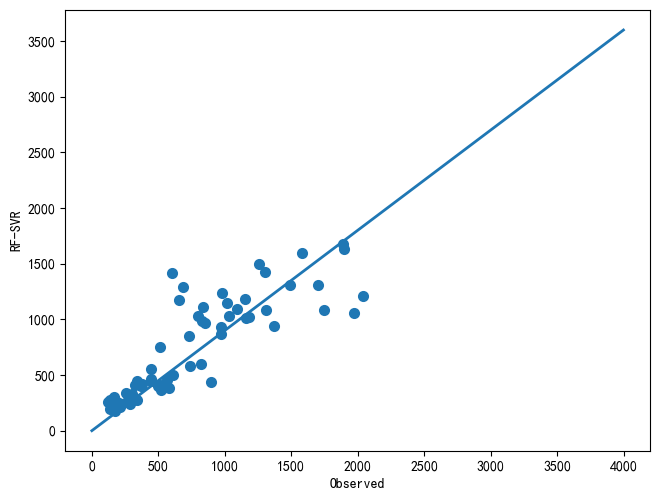

In [54]:
#测试集数据画回归图
a10=np.arange(4000)
a11=a10*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y1_test,svr_pred1_test,linewidth=2) 
plt.plot(a10,a11,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y1_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

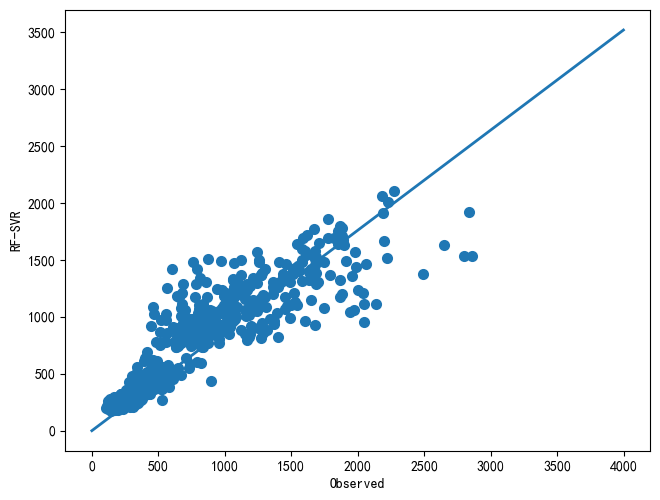

In [55]:
#所有数据画回归图
a12=np.arange(4000)
# a13=[(n *1.6) for n in np.arange(4000)]
a13=a12*0.88
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(df_y1,svr_pred1,linewidth=2) 
plt.plot(a12,a13,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y1_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [154]:
a10=np.arange(2100)
a11=a10
a10,a11

(array([   0,    1,    2, ..., 2097, 2098, 2099]),
 array([   0,    1,    2, ..., 2097, 2098, 2099]))

In [47]:
# plt.plot([0,0],[3000,3000])
# plt.plot(xx11,df_y1,label="Observed",linewidth=3) 
# plt.plot(xx11,svr_pred1,label="RF-MLP",linewidth=2)

# plt.scatter(xx11,df_y1,label="Observed",linewidth=3) 
# plt.scatter(xx11,svr_pred1,label="RF-MLP",linewidth=2)

# plt.scatter(df_y1,svr_pred1,label="RF-MLP",linewidth=2,color='forestgreen')
# plt.scatter(df_y1,svr_pred1,label="RF-SVR",linewidth=2,color='forestgreen')
plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
a10=np.arange(2800)
a11=a10
plt.plot(a10,a11,linewidth=2)
plt.show()

NameError: name 'svr_pred1_test' is not defined

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7594276501152617 {'C': 50, 'epsilon': 150, 'gamma': 'scale', 'kernel': 'poly'}
训练集mse: 246112.88769758015,训练集r2_score: 0.7749159969329323
训练集mae: 283.62075531260797,训练集mape: 0.2210039725198758
训练集msle: 0.07477656603299383
测试集mse: 278253.0046273105,测试集r2_score: 0.7234676315538383
测试集mae: 335.89520201830476,测试集mape: 0.2383784241742786
测试集msle: 0.07909372103574397


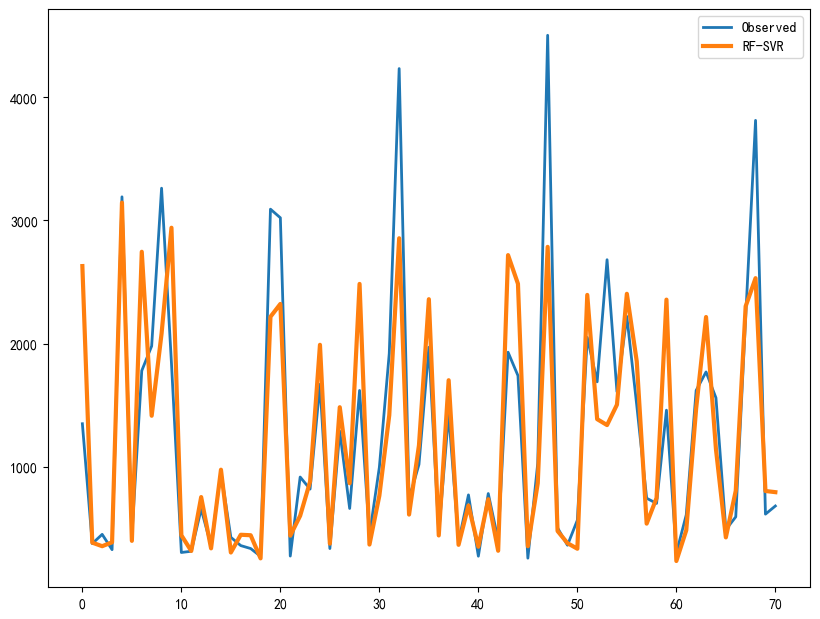

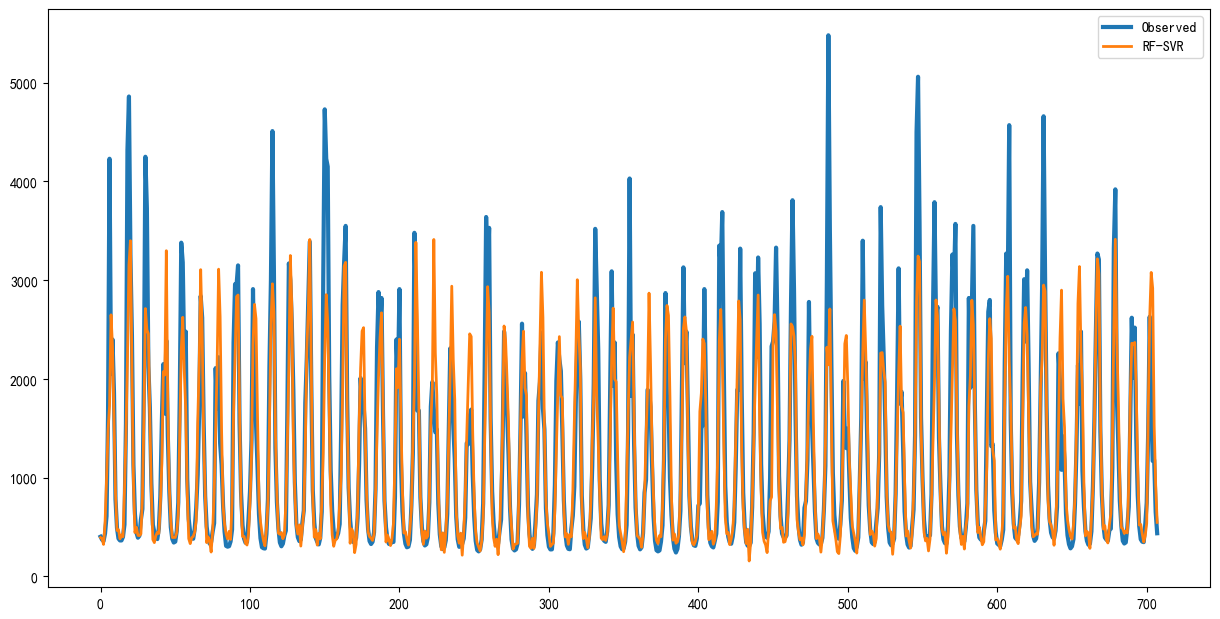

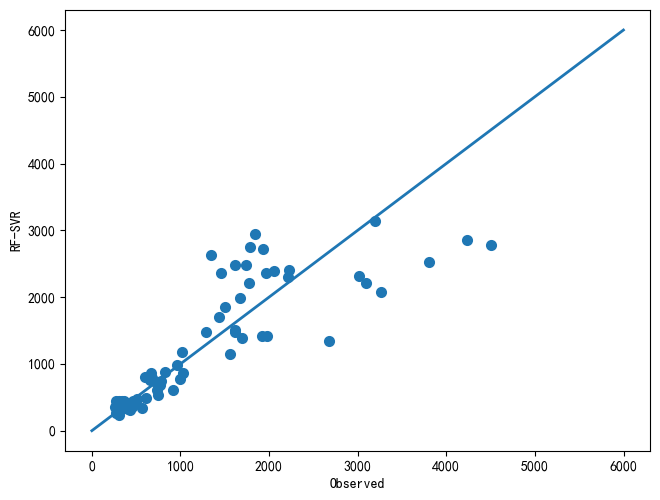

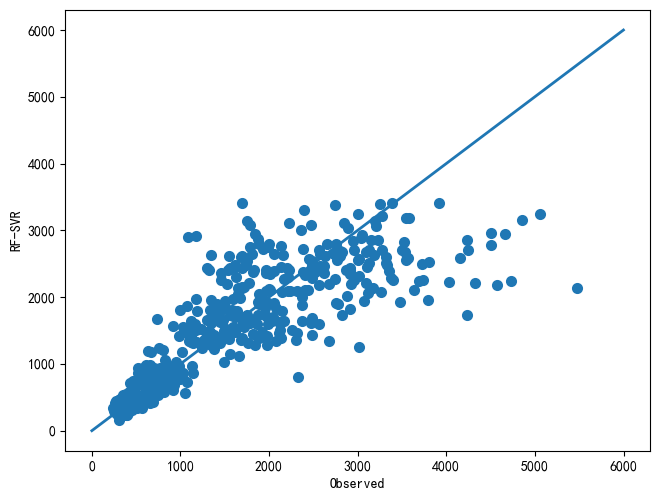

In [21]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMrX2,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集c
X2_train,X2_test,y2_train,y2_test=train_test_split(MMrX2,df_y2,test_size=0.1,random_state=34,shuffle=True)
# X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param2=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]

# 最好的参数：
# {'C':[2009,2100,2101,2102],'kernel':['poly','rbf','sigmoid'],'epsilon':[210,211,212],'gamma':['auto','scale']}#默认gamma值为scale。
# 选出来后为：0.8026501462941118 {'C': 2102, 'epsilon': 212, 'gamma': 'scale', 'kernel': 'rbf'}

grid_param2=[
#     {'C':[5,10,15,20,50,75],'kernel': ['linear'], 'epsilon':[1,5,10,25,50,100,150]},#linear内核不接受“gamma”作为参数；
#     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[1900,2000,2100,2500,2750,2900,3000,3100,3250,3500,3750,4000,4250,4500,4750,5000,5250,5500],'kernel':['poly','rbf','sigmoid'],'epsilon':[175,190,200,205,210,225,230,235,250],'gamma':['auto','scale']}#默认gamma值为scale。
    {'C':[50],'kernel':['poly','rbf','sigmoid'],'epsilon':[150],'gamma':['auto','scale']}#默认gamma值为scale。

    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr2=GridSearchCV(SVR(), grid_param2,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr2=GridSearchCV(SVR(), grid_param2,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr2=GridSearchCV(SVR(), grid_param2,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr2.fit(X2_train,y2_train)
print(grid_svr2.best_score_, grid_svr2.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred2_train=grid_svr2.predict(X2_train)
svr_pred2_test=grid_svr2.predict(X2_test)

print(f'训练集mse: {mean_squared_error(y2_train,svr_pred2_train)},训练集r2_score: {r2_score(y2_train,svr_pred2_train)}')
print(f'训练集mae: {mean_absolute_error(y2_train,svr_pred2_train)},训练集mape: {mean_absolute_percentage_error(y2_train,svr_pred2_train)}')
print(f'训练集msle: {msle(y2_train,svr_pred2_train)}')
      
print(f'测试集mse: {mean_squared_error(y2_test,svr_pred2_test)},测试集r2_score: {r2_score(y2_test,svr_pred2_test)}')
print(f'测试集mae: {mean_absolute_error(y2_test,svr_pred2_test)},测试集mape: {mean_absolute_percentage_error(y2_test,svr_pred2_test)}')
print(f'测试集msle: {msle(y2_test,svr_pred2_test)}')
      
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred2=np.concatenate([svr_pred2_train,svr_pred2_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred2=grid_svr2.predict(MMrX2)

# print(svr_pred2.shape,svr_pred2)
# print(type(svr_pred2))#<class 'numpy.ndarray'>
# print(svr_pred2)
np.savetxt('svr_pred2_y2.csv', svr_pred2, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('svr_pred2_y21.csv', svr_pred2, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx20=range(0,len(y2_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx20,y2_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx20,svr_pred2_test,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx20,y2_test,label="Observed",linewidth=2) 
plt.plot(xx20,svr_pred2_test,label="RF-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y20test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx21=range(0,len(df_y2))
plt.figure(figsize=(12,6))
# plt.scatter(xx21,df_y2,color="red",label="Observed-JinPing",linewidth=3) 
# plt.plot(xx21,svr_pred2,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx21,df_y2,label="Observed",linewidth=3)
plt.plot(xx21,svr_pred2,label="RF-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y20full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a20=np.arange(6000)
a21=a20*1
# plt.scatter(y2_test,svr_pred2_test,label="Observed",linewidth=2) 
plt.scatter(y2_test,svr_pred2_test,linewidth=2) 
plt.plot(a20,a21,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a22=np.arange(6000)
a23=a22*1
# plt.scatter(y2_test,svr_pred2_test,label="Observed",linewidth=2) 
plt.scatter(df_y2,svr_pred2,linewidth=2) 
plt.plot(a22,a23,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

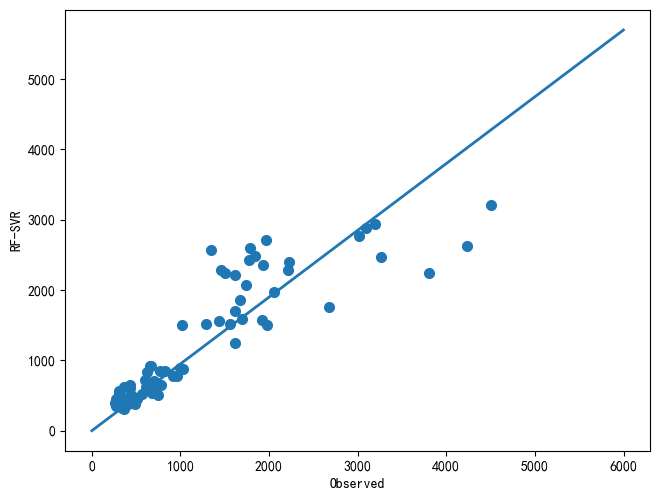

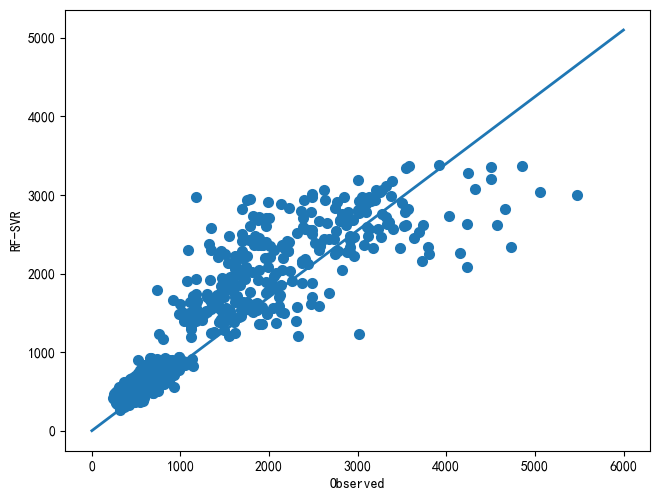

In [40]:
#测试集数据画回归图
a20=np.arange(6000)
a21=a20*0.95
# plt.scatter(y2_test,svr_pred2_test,label="Observed",linewidth=2) 
plt.scatter(y2_test,svr_pred2_test,linewidth=2) 
plt.plot(a20,a21,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a22=np.arange(6000)
a23=a22*0.85
# plt.scatter(y2_test,svr_pred2_test,label="Observed",linewidth=2) 
plt.scatter(df_y2,svr_pred2,linewidth=2) 
plt.plot(a22,a23,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.801155223402532 {'C': 3000, 'epsilon': 100, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 227901.73877385183,训练集r2_score: 0.8419684083835828
训练集mae: 268.1922379457881,训练集mape: 0.16901273129965672
训练集msle: 0.0456803909250009
测试集mse: 264259.81707583513,测试集r2_score: 0.8020431271227679
测试集mae: 308.7004016859301,测试集mape: 0.1903102618267822
测试集msle: 0.05817342038385105


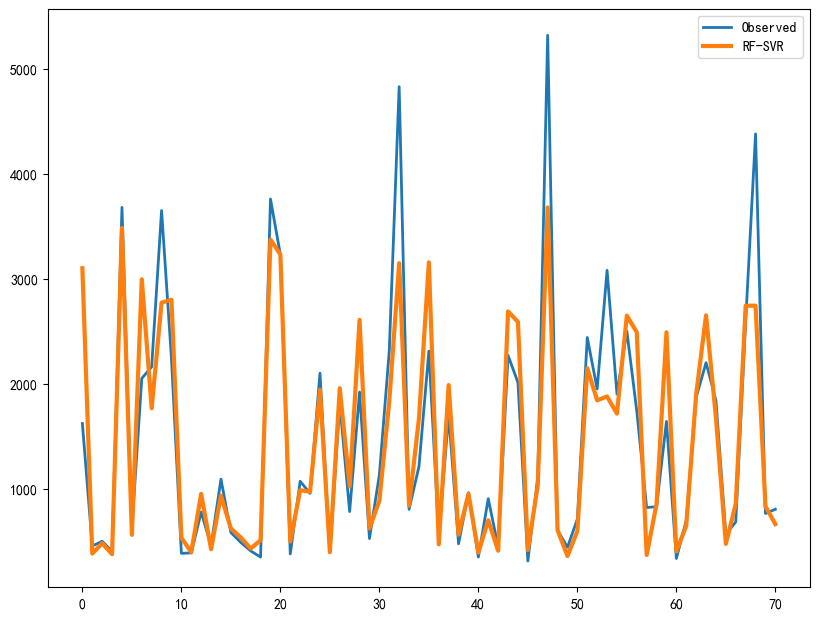

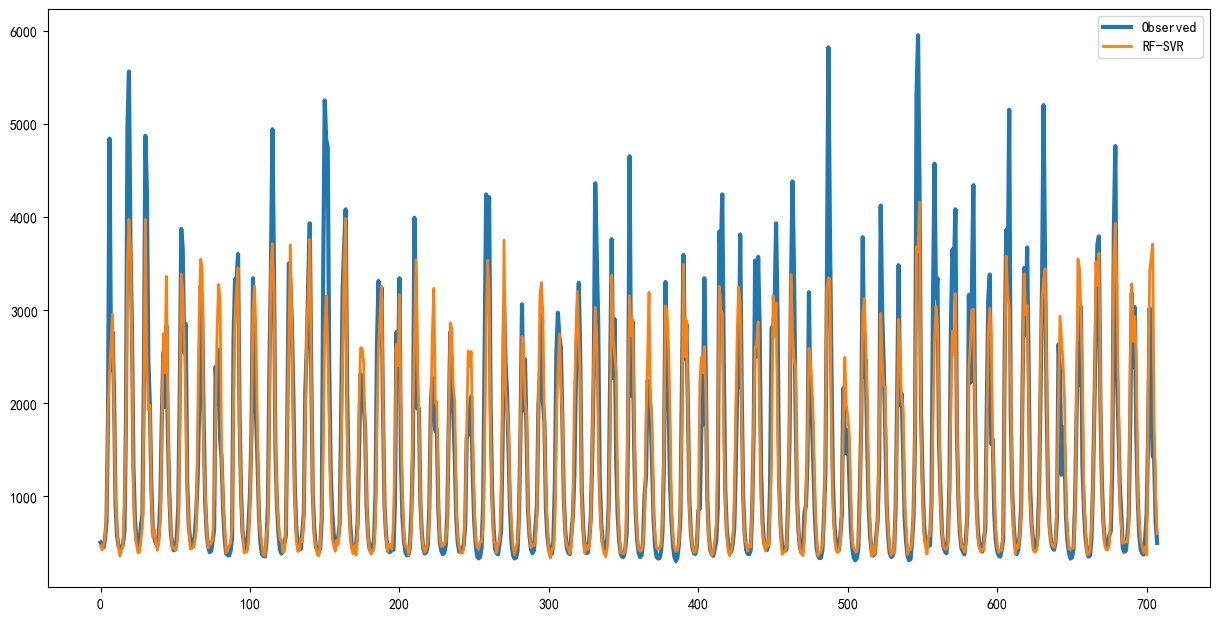

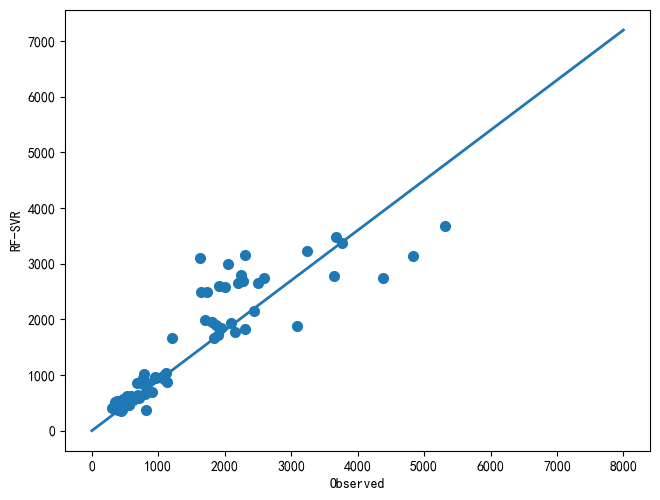

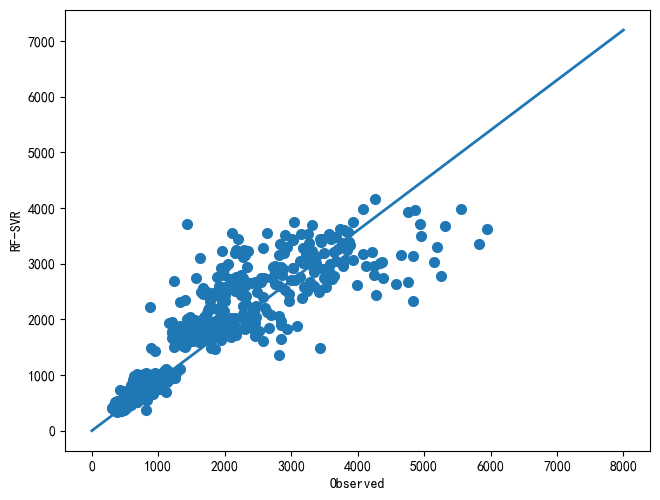

In [45]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMrX3,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集c
X3_train,X3_test,y3_train,y3_test=train_test_split(MMrX3,df_y3,test_size=0.1,random_state=34,shuffle=True)
# X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param3=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param3=[
#     {'C':[0.1,0.5,1,5,10,20,50],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[3250,3500,3750,4000,4250,4500,4750,5000,5100,5250],'kernel':['poly','rbf','sigmoid'],'epsilon':[280,290,295,300,310,325,350,400],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[3250,3500,3750],'kernel':['poly','rbf','sigmoid'],'epsilon':[290,295,300,310],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[3000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100],'gamma':['auto','scale']}#默认gamma值为scale。

#{'C':[3500],'kernel':['poly','rbf','sigmoid'],'epsilon':[300],'gamma':['auto','scale']}#默认gamma值为scale。这个效果也挺好的。
]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr3=GridSearchCV(SVR(), grid_param3,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr3=GridSearchCV(SVR(), grid_param3,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr3=GridSearchCV(SVR(), grid_param3,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr3.fit(X3_train,y3_train)
print(grid_svr3.best_score_, grid_svr3.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred3_train=grid_svr3.predict(X3_train)
svr_pred3_test=grid_svr3.predict(X3_test)
print(f'训练集mse: {mean_squared_error(y3_train,svr_pred3_train)},训练集r2_score: {r2_score(y3_train,svr_pred3_train)}')
print(f'训练集mae: {mean_absolute_error(y3_train,svr_pred3_train)},训练集mape: {mean_absolute_percentage_error(y3_train,svr_pred3_train)}')
print(f'训练集msle: {msle(y3_train,svr_pred3_train)}')
      
print(f'测试集mse: {mean_squared_error(y3_test,svr_pred3_test)},测试集r2_score: {r2_score(y3_test,svr_pred3_test)}')
print(f'测试集mae: {mean_absolute_error(y3_test,svr_pred3_test)},测试集mape: {mean_absolute_percentage_error(y3_test,svr_pred3_test)}')
print(f'测试集msle: {msle(y3_test,svr_pred3_test)}')

#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred3=np.concatenate([svr_pred3_train,svr_pred3_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred3=grid_svr3.predict(MMrX3)

# print(svr_pred3.shape,svr_pred3)
# print(type(svr_pred3))#<class 'numpy.ndarray'>
# print(svr_pred3)
np.savetxt('svr_pred3_y3.csv', svr_pred3, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('svr_pred3_y31.csv', svr_pred3, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx30=range(0,len(y3_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx30,y3_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx30,svr_pred3_test,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx30,y3_test,label="Observed",linewidth=2) 
plt.plot(xx30,svr_pred3_test,label="RF-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y30test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx31=range(0,len(df_y3))
plt.figure(figsize=(12,6))
# plt.scatter(xx31,df_y3,color="red",label="Observed",linewidth=3) 
# plt.plot(xx31,svr_pred3,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx31,df_y3,label="Observed",linewidth=3) 
plt.plot(xx31,svr_pred3,label="RF-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y30full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a30=np.arange(8000)
a31=a30*0.9
# plt.scatter(y3_test,svr_pred3_test,label="Observed",linewidth=2) 
plt.scatter(y3_test,svr_pred3_test,linewidth=2) 
plt.plot(a30,a31,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y3_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a32=np.arange(8000)
a33=a32*0.9
# plt.scatter(y3_test,svr_pred3_test,label="Observed",linewidth=2) 
plt.scatter(df_y3,svr_pred3,linewidth=2) 
plt.plot(a32,a33,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y3_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

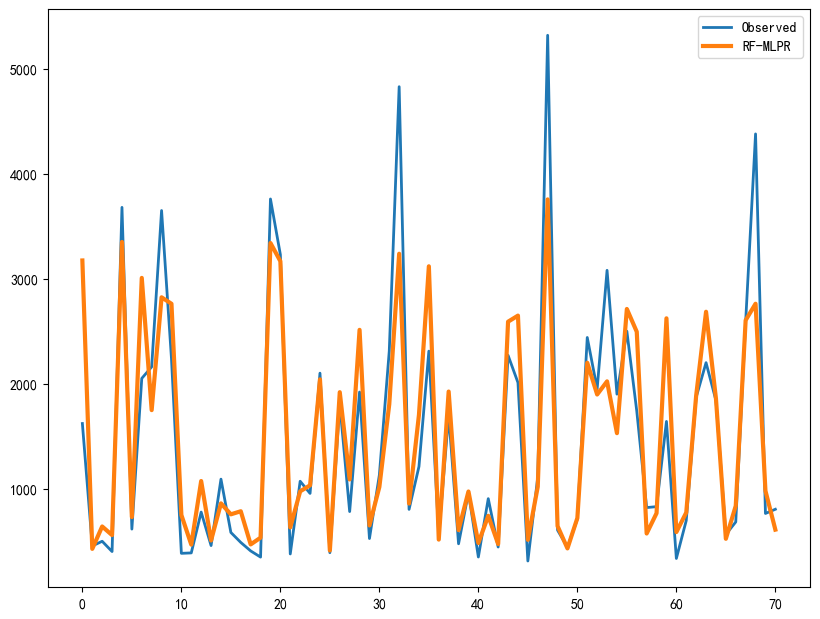

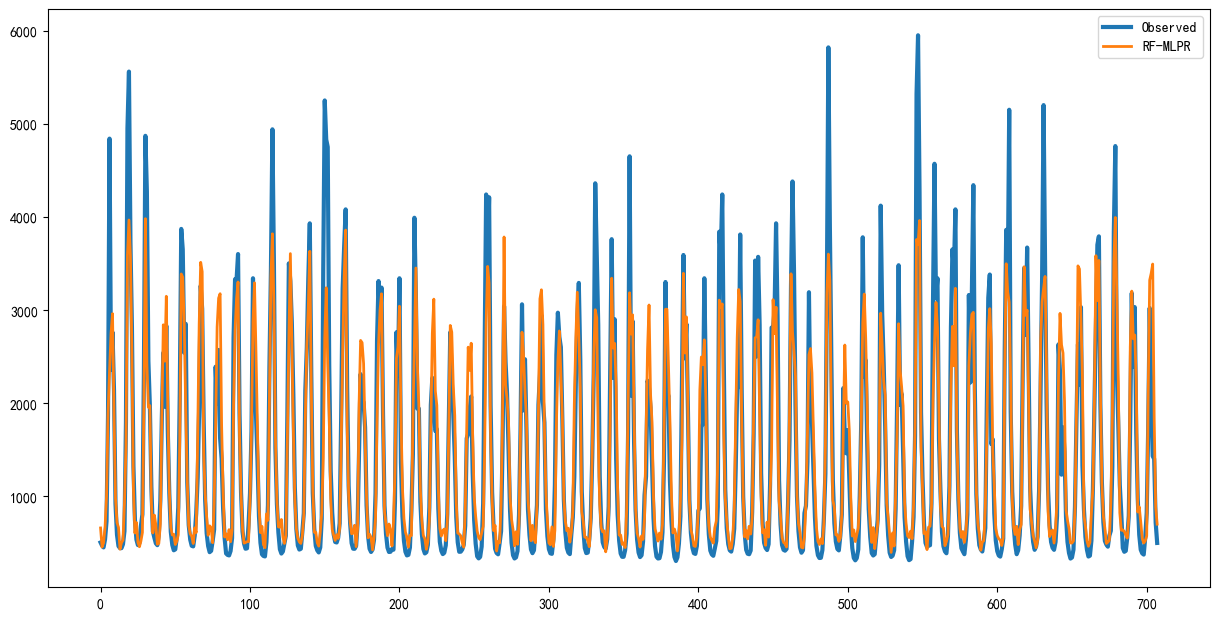

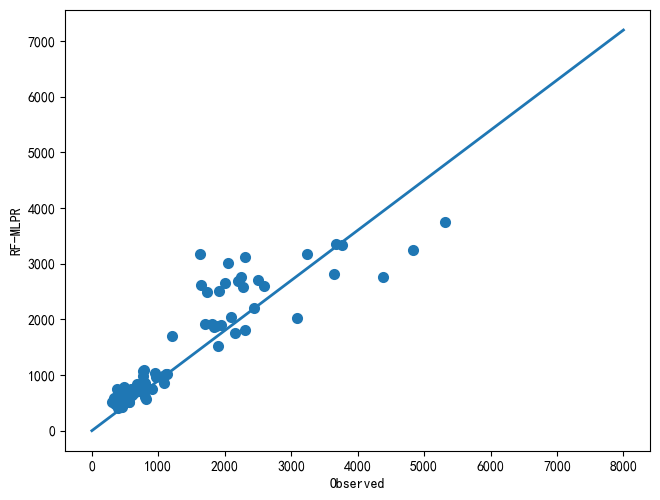

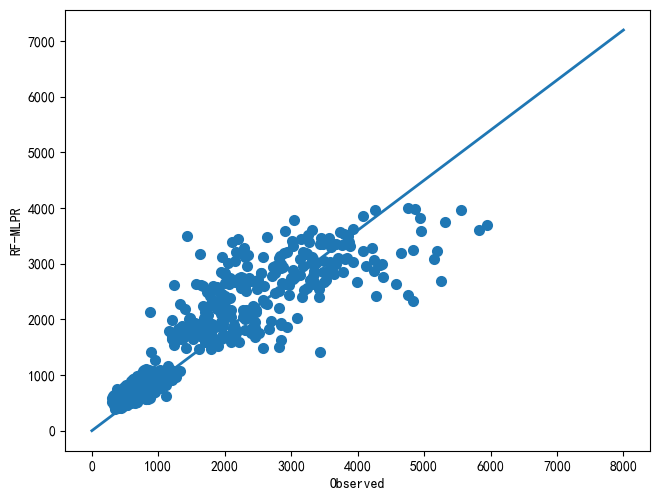

In [22]:
#测试集画图
import matplotlib.pyplot as plt
xx30=range(0,len(y3_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx30,y3_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx30,svr_pred3_test,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx30,y3_test,label="Observed",linewidth=2) 
plt.plot(xx30,svr_pred3_test,label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y32test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx31=range(0,len(df_y3))
plt.figure(figsize=(12,6))
# plt.scatter(xx31,df_y3,color="red",label="Observed",linewidth=3) 
# plt.plot(xx31,svr_pred3,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx31,df_y3,label="Observed",linewidth=3) 
plt.plot(xx31,svr_pred3,label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y32full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a30=np.arange(8000)
a31=a30*0.9
# plt.scatter(y3_test,svr_pred3_test,label="Observed",linewidth=2) 
plt.scatter(y3_test,svr_pred3_test,linewidth=2) 
plt.plot(a30,a31,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y32_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a32=np.arange(8000)
a33=a32*0.9
# plt.scatter(y3_test,svr_pred3_test,label="Observed",linewidth=2) 
plt.scatter(df_y3,svr_pred3,linewidth=2) 
plt.plot(a32,a33,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y32_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8114485503674197 {'C': 2250, 'epsilon': 201, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 288775.4659332818,训练集r2_score: 0.8538189344419904
训练集mae: 309.7848385191408,训练集mape: 0.19032127519996794
训练集msle: 0.05291726504358498
测试集mse: 420273.33297757286,测试集r2_score: 0.7644226395357248
测试集mae: 405.62455063567353,测试集mape: 0.2267901049002188
测试集msle: 0.07610604331128805


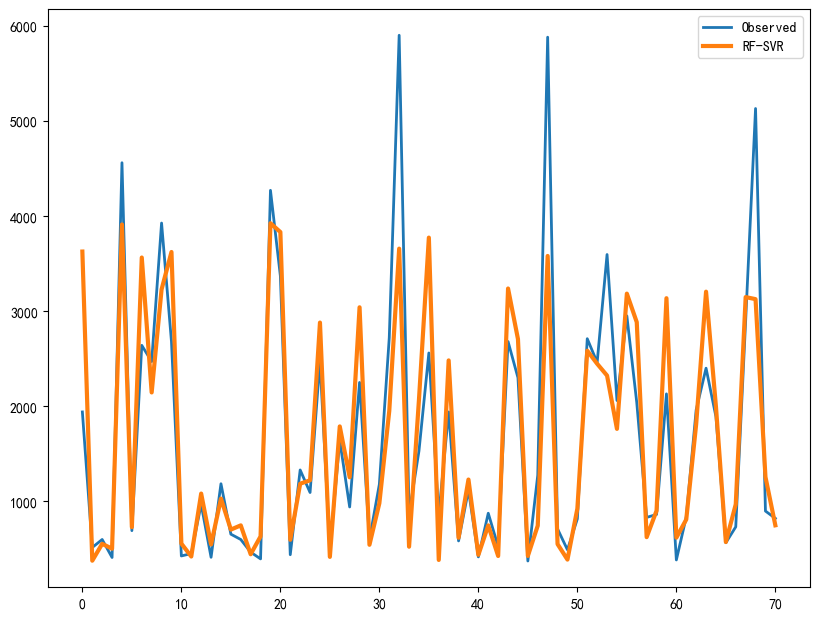

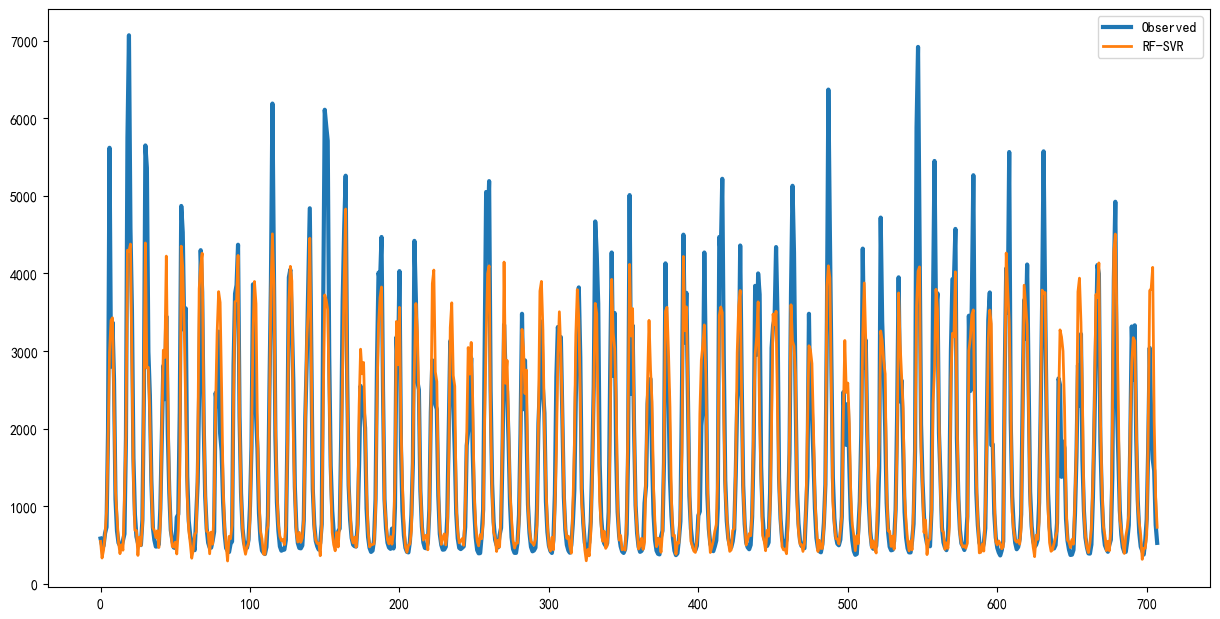

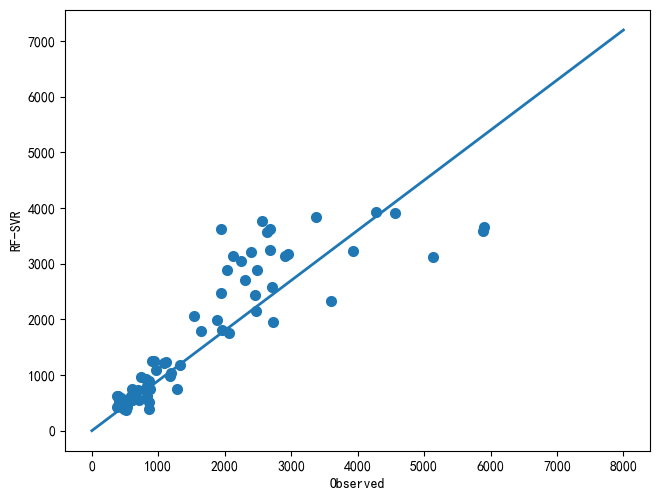

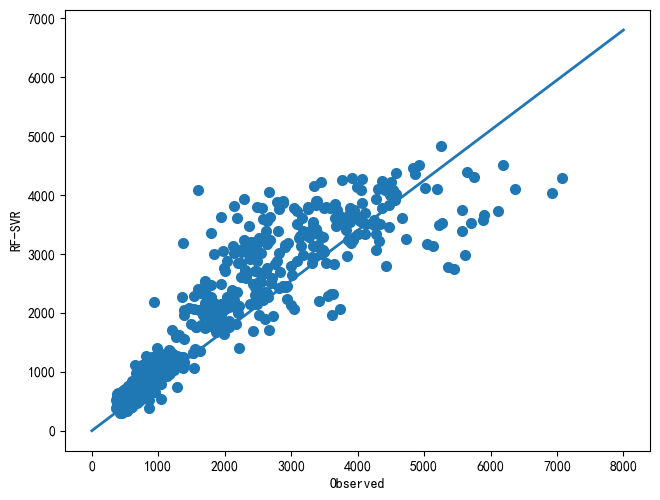

In [22]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMrX4,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集c
X4_train,X4_test,y4_train,y4_test=train_test_split(MMrX4,df_y4,test_size=0.1,random_state=34,shuffle=True)
# X4_train.shape,X4_test.shape,y4_train.shape,y4_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param4=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param4=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[2000,3000,3500,5000,5250,5500,6000,6250,6500],'kernel':['poly','rbf','sigmoid'],'epsilon':[200,225,250,275,300,325,350,400,450,500],'gamma':['auto','scale']}#默认gamma值为scale。
    {'C':[2248,2250],'kernel':['poly','rbf','sigmoid'],'epsilon':[198,199,200,201],'gamma':['auto','scale']}#默认gamma值为scale。
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr4=GridSearchCV(SVR(), grid_param4,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr4=GridSearchCV(SVR(), grid_param4,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr4=GridSearchCV(SVR(), grid_param4,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr4.fit(X4_train,y4_train)
print(grid_svr4.best_score_, grid_svr4.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred4_train=grid_svr4.predict(X4_train)
svr_pred4_test=grid_svr4.predict(X4_test)
print(f'训练集mse: {mean_squared_error(y4_train,svr_pred4_train)},训练集r2_score: {r2_score(y4_train,svr_pred4_train)}')
print(f'训练集mae: {mean_absolute_error(y4_train,svr_pred4_train)},训练集mape: {mean_absolute_percentage_error(y4_train,svr_pred4_train)}')
print(f'训练集msle: {msle(y4_train,svr_pred4_train)}')
      
print(f'测试集mse: {mean_squared_error(y4_test,svr_pred4_test)},测试集r2_score: {r2_score(y4_test,svr_pred4_test)}')
print(f'测试集mae: {mean_absolute_error(y4_test,svr_pred4_test)},测试集mape: {mean_absolute_percentage_error(y4_test,svr_pred4_test)}')
print(f'测试集msle: {msle(y4_test,svr_pred4_test)}')

#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred4=np.concatenate([svr_pred4_train,svr_pred4_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred4=grid_svr4.predict(MMrX4)
# print(svr_pred4.shape,svr_pred4)
# print(type(svr_pred4))#<class 'numpy.ndarray'>
# print(svr_pred4)
np.savetxt('svr_pred4_y4.csv', svr_pred4, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('svr_pred4_y41.csv', svr_pred4, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx40=range(0,len(y4_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx40,y4_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx40,svr_pred4_test,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx40,y4_test,label="Observed",linewidth=2) 
plt.plot(xx40,svr_pred4_test,label="RF-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y40test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx41=range(0,len(df_y4))
plt.figure(figsize=(12,6))
# plt.scatter(xx41,df_y4,color="red",label="Observed",linewidth=3) 
# plt.plot(xx41,svr_pred4,color="orange",label="RF-SVR",linewidth=2)
plt.plot(xx41,df_y4,label="Observed",linewidth=3) 
plt.plot(xx41,svr_pred4,label="RF-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y40full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a40=np.arange(8000)
a41=a40*0.9
# plt.scatter(y4_test,svr_pred4_test,label="Observed",linewidth=2) 
plt.scatter(y4_test,svr_pred4_test,linewidth=2) 
plt.plot(a40,a41,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y4_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a42=np.arange(8000)
a43=a42*0.85
# plt.scatter(y4_test,svr_pred4_test,label="Observed",linewidth=2) 
plt.scatter(df_y4,svr_pred4,linewidth=2) 
plt.plot(a42,a43,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR_y4_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
print(grid2.best_score_, grid2.best_params_)#0.7781210475911909 {'C': 50, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'poly'}

In [ ]:
print(grid2.cv_results_)

## 2.以下为MLP预测部分

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


-156459.2458900994 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 128, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 45114.354751519335,训练集r2_score: 0.8547120457041908
训练集mae: 133.3725463175036,训练集mape: 0.2117228787409613
训练集msle: 0.06738723927240006
测试集mse: 60177.91695323029,测试集r2_score: 0.7834487458874799
测试集mae: 161.42013549045168,测试集mape: 0.235728603590421
测试集msle: 0.07556605422004464


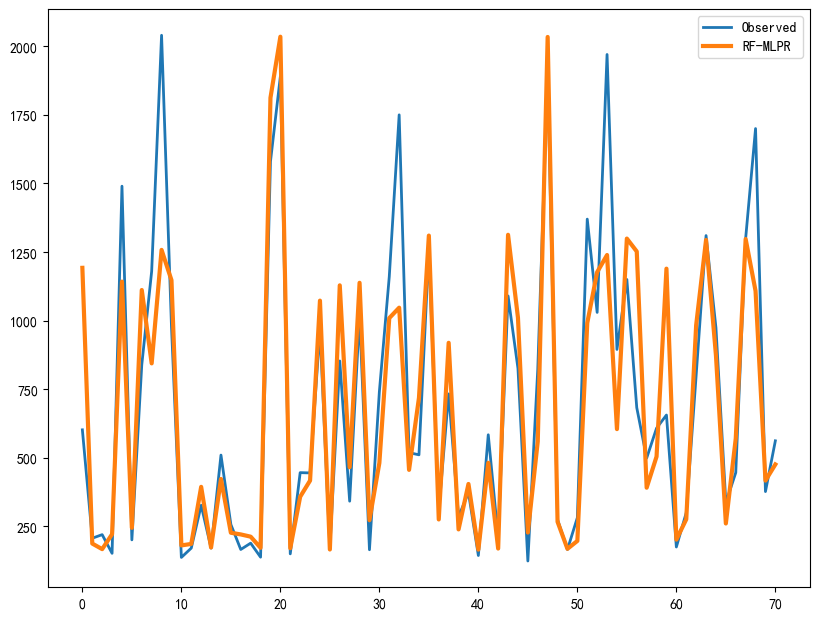

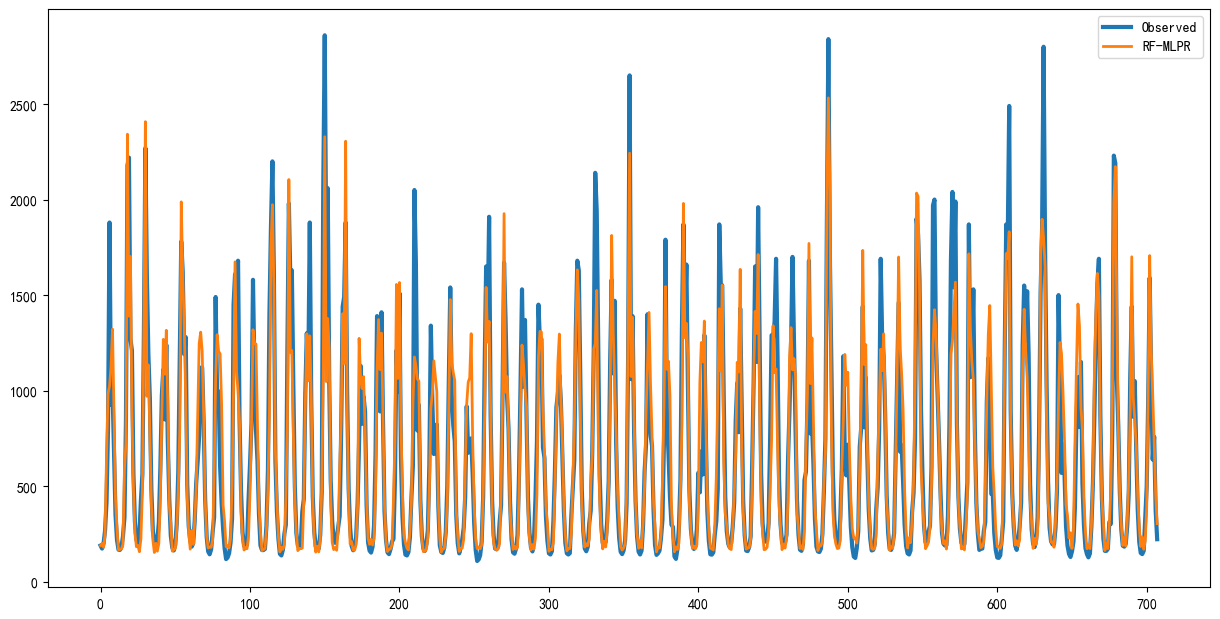

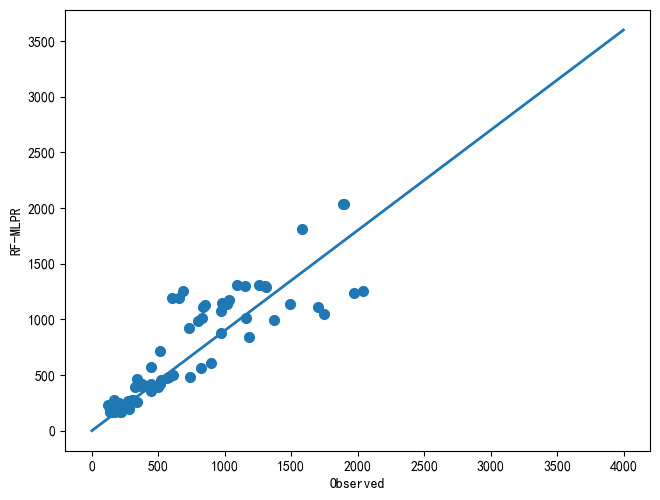

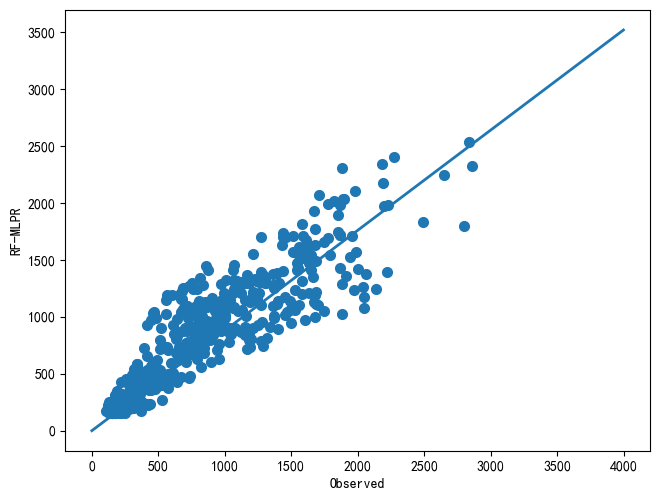

In [21]:
## MLP5预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP5=MLPRegressor()#early_stopping=True

# MLP5param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

# MLP5param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(128,64,32,8,1),(256,128,32,16,1)], 'activation': ['logistic', 'tanh', 'relu'],
#      'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.005]}
# ]
MLP5param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.0005]}
]
# ,(256,128,32,16,1)

# MLP5 = MLP5Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X5_train,X5_test,y5_train,y5_test=train_test_split(MMrX1,df_y1,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP5=cross_validate(estimator=MLP5, X1_train,y5_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP5=GridSearchCV(estimator=MLP5, param_grid=MLP5param_grid,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=5)

print ("Training in progress:")
grid_MLP5.fit(X5_train,y5_train)
print(grid_MLP5.best_score_, grid_MLP5.best_params_)
# grid_MLP5.score(X5_train,y5_train),grid_MLP5.score(X5_test,y5_test)
mlp_pred5_train = grid_MLP5.predict(X5_train)
mlp_pred5_test = grid_MLP5.predict(X5_test)

print(f'训练集mse: {mean_squared_error(y5_train,mlp_pred5_train)},训练集r2_score: {r2_score(y5_train,mlp_pred5_train)}')
print(f'训练集mae: {mean_absolute_error(y5_train,mlp_pred5_train)},训练集mape: {mean_absolute_percentage_error(y5_train,mlp_pred5_train)}')
print(f'训练集msle: {msle(y5_train,mlp_pred5_train)}')
      
print(f'测试集mse: {mean_squared_error(y5_test,mlp_pred5_test)},测试集r2_score: {r2_score(y5_test,mlp_pred5_test)}')
print(f'测试集mae: {mean_absolute_error(y5_test,mlp_pred5_test)},测试集mape: {mean_absolute_percentage_error(y5_test,mlp_pred5_test)}')
print(f'测试集msle: {msle(y5_test,mlp_pred5_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred5=np.concatenate([mlp_pred5_train,mlp_pred5_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred5=grid_MLP5.predict(MMrX1)

# print(mlp_pred5.shape,mlp_pred5)
# print(type(mlp_pred5))#<class 'numpy.ndarray'>
# print(mlp_pred5)
np.savetxt('mlp_pred5_y1.csv', mlp_pred5, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('mlp_pred5_y11.csv', mlp_pred5, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx50=range(0,len(y5_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx50,y5_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx50,mlp_pred5_test,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx50,y5_test,label="Observed",linewidth=2) 
plt.plot(xx50,mlp_pred5_test,label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y11test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx51=range(0,len(df_y1))
plt.figure(figsize=(12,6))
# plt.scatter(xx51,df_y1,color="red",label="Observed",linewidth=3) 
# plt.plot(xx51,mlp_pred5,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx51,df_y1,label="Observed",linewidth=3) 
plt.plot(xx51,mlp_pred5,label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y11full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a50=np.arange(4000)
a51=a50*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y5_test,mlp_pred5_test,linewidth=2) 
plt.plot(a50,a51,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y1_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a52=np.arange(4000)
# a53=[(n *1.6) for n in np.arange(4000)]
a53=a52*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y1,mlp_pred5,linewidth=2) 
plt.plot(a52,a53,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y1_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [186]:
len(y5_test)

71

In [ ]:
pred5=np.concatenate([pred5_train,pred5_test],axis=0)
# print(pred5.shape,pred5)
print(pred5)
np.savetxt('pred5_y1.csv', pred5, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
# np.savetxt('pred5_y11.csv', pred5, delimiter=',')#默认使用科学计数法。
# print(type(pred5))#<class 'numpy.ndarray'>

In [ ]:
## MLP6预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP6=MLPRegressor()#early_stopping=True

# MLP6param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1c)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

MLP6param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0005]}]
# ,(256,128,32,16,1),(256,128,64,32,16,8,1),0.0007,0.001

# MLP6 = MLP6Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X6_train,X6_test,y6_train,y6_test=train_test_split(MMrX2,df_y2,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP6=cross_validate(estimator=MLP6, X1_train,y6_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP6=GridSearchCV(estimator=MLP6, param_grid=MLP6param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP6.fit(X6_train,y6_train)
print(grid_MLP6.best_score_, grid_MLP6.best_params_)
# grid_MLP6.score(X6_train,y6_train),grid_MLP6.score(X6_test,y6_test)
mlp_pred6_train = grid_MLP6.predict(X6_train)
mlp_pred6_test = grid_MLP6.predict(X6_test)

print(f'训练集mse: {mean_squared_error(y6_train,mlp_pred6_train)},训练集r2_score: {r2_score(y6_train,mlp_pred6_train)}')
print(f'训练集mae: {mean_absolute_error(y6_train,mlp_pred6_train)},训练集mape: {mean_absolute_percentage_error(y6_train,mlp_pred6_train)}')
print(f'训练集msle: {msle(y6_train,mlp_pred6_train)}')
      
print(f'测试集mse: {mean_squared_error(y6_test,mlp_pred6_test)},测试集r2_score: {r2_score(y6_test,mlp_pred6_test)}')
print(f'测试集mae: {mean_absolute_error(y6_test,mlp_pred6_test)},测试集mape: {mean_absolute_percentage_error(y6_test,mlp_pred6_test)}')
print(f'测试集msle: {msle(y6_test,mlp_pred6_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred6=np.concatenate([mlp_pred6_train,mlp_pred6_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred6=grid_MLP6.predict(MMrX2)

# print(mlp_pred6.shape,mlp_pred6)
# print(type(mlp_pred6))#<class 'numpy.ndarray'>
# print(mlp_pred6)
np.savetxt('mlp_pred6_y1.csv', mlp_pred6, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('mlp_pred6_y11.csv', mlp_pred6, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx60=range(0,len(y6_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx60,y6_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx60,mlp_pred6_test,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx60,y6_test,label="Observed",linewidth=2) 
plt.plot(xx60,mlp_pred6_test,label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y21test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx61=range(0,len(df_y2))
plt.figure(figsize=(12,6))
# plt.scatter(xx61,df_y2,color="red",label="Observed",linewidth=3) 
# plt.plot(xx61,mlp_pred6,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx61,df_y2,label="Observed",linewidth=3) 
plt.plot(xx61,mlp_pred6,label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y21full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a60=np.arange(6000)
a61=a60*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y6_test,mlp_pred6_test,linewidth=2) 
plt.plot(a60,a61,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a62=np.arange(6000)
# a63=[(n *1.6) for n in np.arange(4000)]
a63=a62*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y2,mlp_pred6,linewidth=2) 
plt.plot(a62,a63,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

Training in progress:


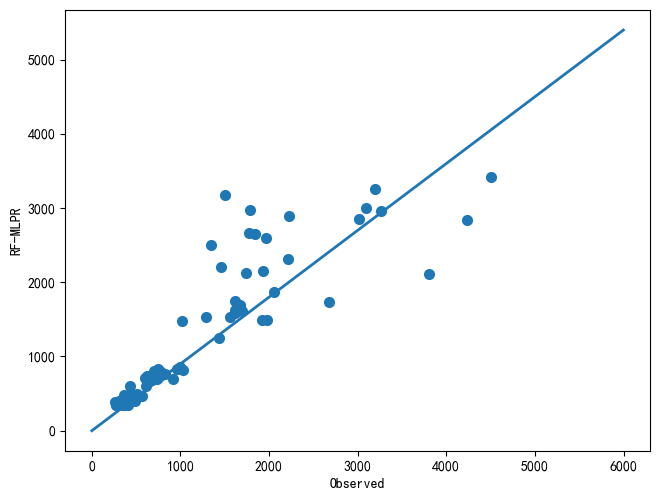

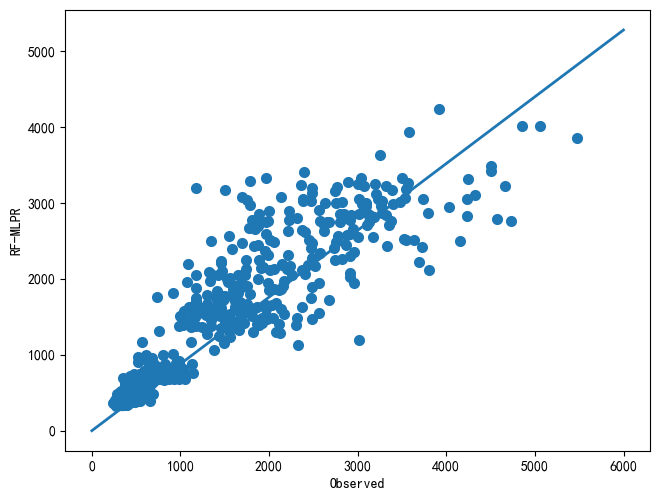

In [25]:
#测试集数据画回归图
a60=np.arange(6000)
a61=a60*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y6_test,mlp_pred6_test,linewidth=2) 
plt.plot(a60,a61,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a62=np.arange(6000)
# a63=[(n *1.6) for n in np.arange(4000)]
a63=a62*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y2,mlp_pred6,linewidth=2) 
plt.plot(a62,a63,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
# plt.plot([0,0],[3000,3000])
# plt.plot(xx11,df_y1,label="Observed",linewidth=3) 
# plt.plot(xx11,svr_pred1,label="RF-MLP",linewidth=2)

# plt.scatter(xx11,df_y1,label="Observed",linewidth=3) 
# plt.scatter(xx11,svr_pred1,label="RF-MLP",linewidth=2)

# plt.scatter(df_y1,svr_pred1,label="RF-MLP",linewidth=2,color='forestgreen')
# plt.scatter(df_y1,svr_pred1,label="RF-SVR",linewidth=2,color='forestgreen')
# plt.scatter(y5_test,mlp_pred5_test,label="Observed",linewidth=2) 
# plt.scatter(y5_test,mlp_pred5_test,linewidth=2) 
# # plt.scatter(df_y1,mlp_pred5,linewidth=2) 
# a10=np.arange(2600)
# a11=a10
# plt.plot(a10,a11,linewidth=2)
# plt.legend('测试集预测值和观测值')

plt.scatter(df_y2,mlp_pred6,linewidth=2) 
a10=np.arange(3500)
a11=a10
plt.plot(a10,a11,linewidth=2,color='g',ls='--')
# plt.legend('全集预测值和观测值')
plt.xlabel('Observed Values')
plt.ylabel('Prediction Values')
plt.show()

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", lin

0.38831083912719117 {'activation': 'relu', 'alpha': 0.0003, 'hidden_layer_sizes': (256, 128, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 250904.77419653194,训练集r2_score: 0.8260176467991694
训练集mae: 294.9504332268386,训练集mape: 0.19148580995684844
训练集msle: 0.05549616694894598
测试集mse: 282288.394649512,测试集r2_score: 0.7885379303115346
测试集mae: 307.23119516221493,测试集mape: 0.19288890648945242
测试集msle: 0.05550476344080402


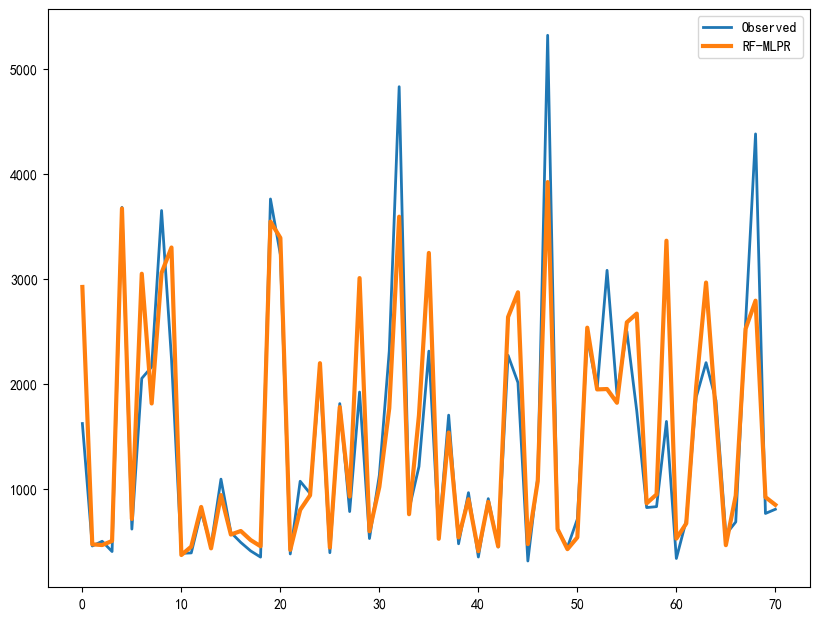

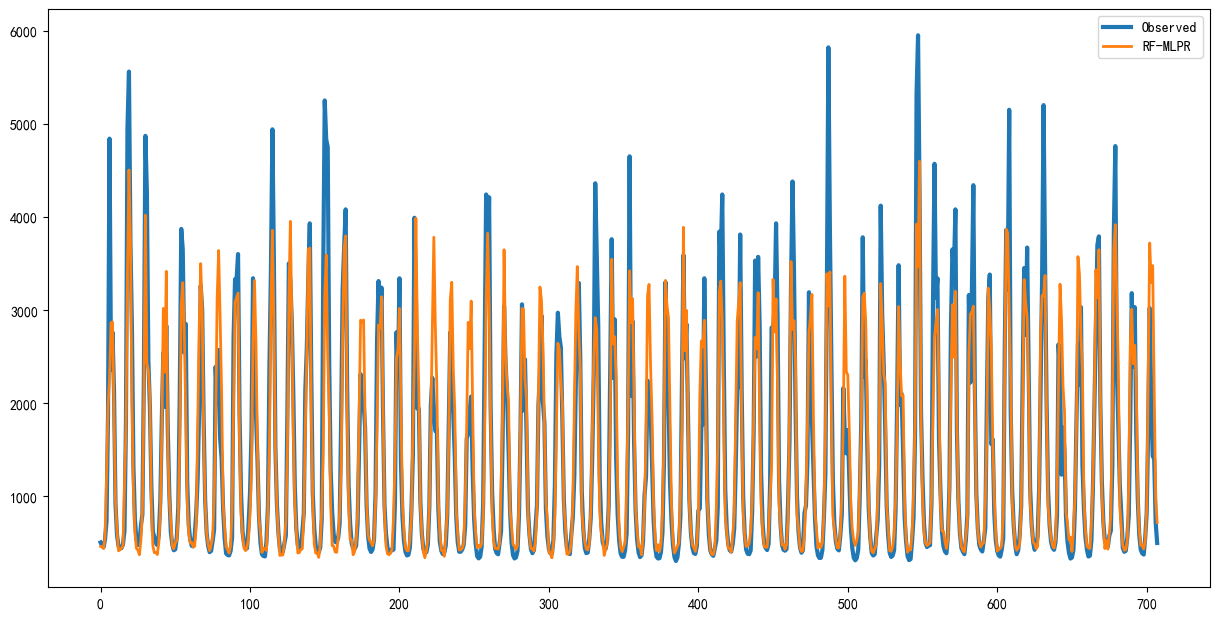

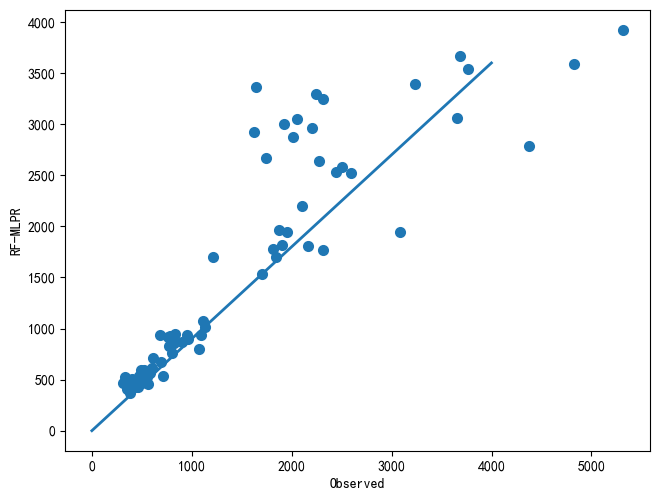

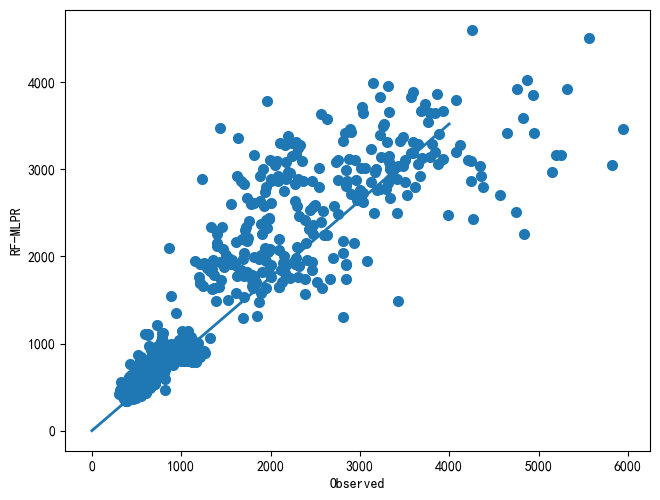

In [23]:
## MLP7预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP7=MLPRegressor()#early_stopping=True

# MLP7param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1c)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

MLP7param_grid=[
    {'hidden_layer_sizes': [(256,128,64,32,16,8,1),(128,64,32,16,8,1),(256,128,32,16,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.0003,0.0005,0.0007,0.001]}
]
# ,(256,128,32,16,1)

# MLP7 = MLP7Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X7_train,X7_test,y7_train,y7_test=train_test_split(MMrX3,df_y3,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP7=cross_validate(estimator=MLP7, X1_train,y7_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP7=GridSearchCV(estimator=MLP7, param_grid=MLP7param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP7.fit(X7_train,y7_train)
# grid_MLP7.score(X7_train,y7_train),grid_MLP7.score(X7_test,y7_test)
print(grid_MLP7.best_score_, grid_MLP7.best_params_)
mlp_pred7_train = grid_MLP7.predict(X7_train)
mlp_pred7_test = grid_MLP7.predict(X7_test)

print(f'训练集mse: {mean_squared_error(y7_train,mlp_pred7_train)},训练集r2_score: {r2_score(y7_train,mlp_pred7_train)}')
print(f'训练集mae: {mean_absolute_error(y7_train,mlp_pred7_train)},训练集mape: {mean_absolute_percentage_error(y7_train,mlp_pred7_train)}')
print(f'训练集msle: {msle(y7_train,mlp_pred7_train)}')
      
print(f'测试集mse: {mean_squared_error(y7_test,mlp_pred7_test)},测试集r2_score: {r2_score(y7_test,mlp_pred7_test)}')
print(f'测试集mae: {mean_absolute_error(y7_test,mlp_pred7_test)},测试集mape: {mean_absolute_percentage_error(y7_test,mlp_pred7_test)}')
print(f'测试集msle: {msle(y7_test,mlp_pred7_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred7=np.concatenate([mlp_pred7_train,mlp_pred7_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred7=grid_MLP7.predict(MMrX3)

# print(mlp_pred7.shape,mlp_pred7)
# print(type(mlp_pred7))#<class 'numpy.ndarray'>
# print(mlp_pred7)
np.savetxt('mlp_pred7_y1_1.csv', mlp_pred7, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('mlp_pred7_y11_1.csv', mlp_pred7, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx70=range(0,len(y7_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx70,y7_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx70,mlp_pred7_test,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx70,y7_test,label="Observed",linewidth=2) 
plt.plot(xx70,mlp_pred7_test,label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y31test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx71=range(0,len(df_y3))
plt.figure(figsize=(12,6))
# plt.scatter(xx71,df_y3,color="red",label="Observed",linewidth=3) 
# plt.plot(xx71,mlp_pred7,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx71,df_y3,label="Observed",linewidth=3) 
plt.plot(xx71,mlp_pred7,label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y31full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a70=np.arange(8000)
a71=a70*0.9
# plt.scatter(y7_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y7_test,mlp_pred7_test,linewidth=2) 
plt.plot(a70,a71,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y3_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a72=np.arange(8000)
# a73=[(n *1.6) for n in np.arange(4000)]
a73=a72*0.88
# plt.scatter(y7_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y3,mlp_pred7,linewidth=2) 
plt.plot(a72,a73,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y3_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

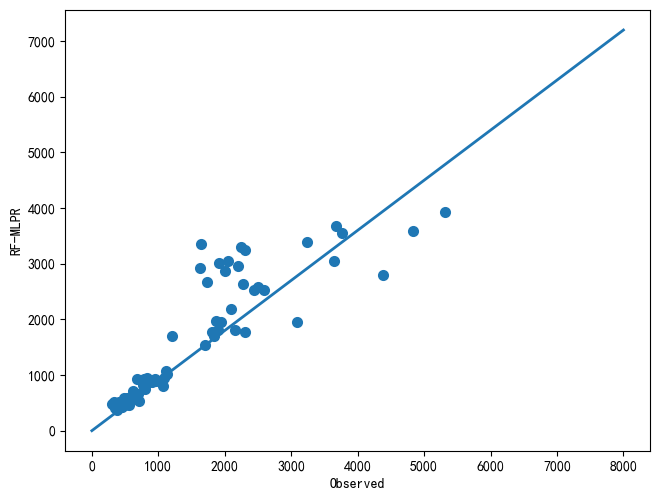

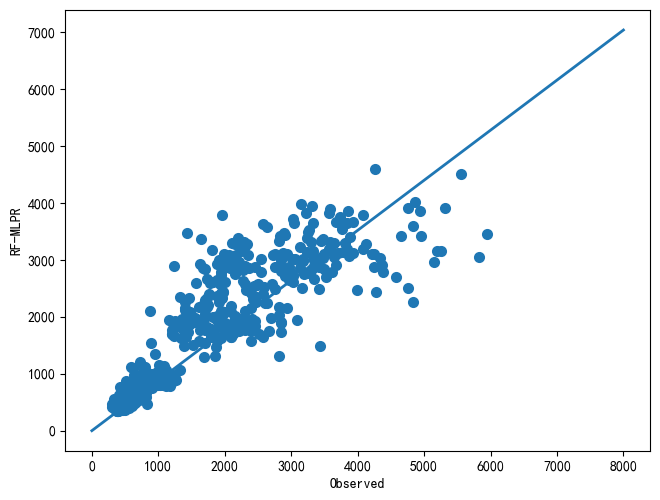

In [26]:
#测试集数据画回归图
a70=np.arange(8000)
a71=a70*0.9
# plt.scatter(y7_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y7_test,mlp_pred7_test,linewidth=2) 
plt.plot(a70,a71,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y3_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a72=np.arange(8000)
# a73=[(n *1.6) for n in np.arange(4000)]
a73=a72*0.88
# plt.scatter(y7_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y3,mlp_pred7,linewidth=2) 
plt.plot(a72,a73,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y3_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line

0.3170677089631853 {'activation': 'relu', 'alpha': 0.00025, 'hidden_layer_sizes': (64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 244588.9517988638,训练集r2_score: 0.8761865954155013
训练集mae: 296.4590586344746,训练集mape: 0.16703675779042332
训练集msle: 0.043948143450295414
测试集mse: 438208.98031745397,测试集r2_score: 0.7543691050213834
测试集mae: 401.6668913979746,测试集mape: 0.1966616932106156
测试集msle: 0.06211246330757726


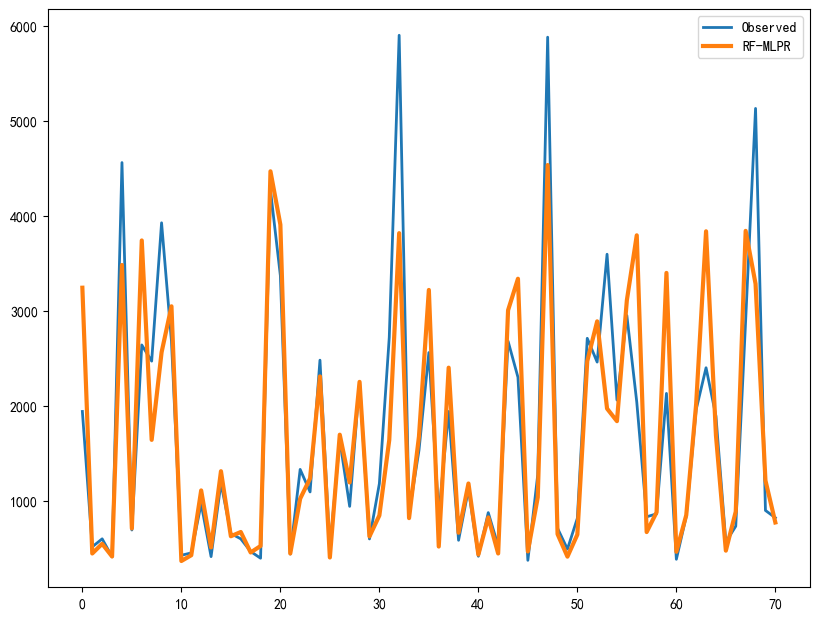

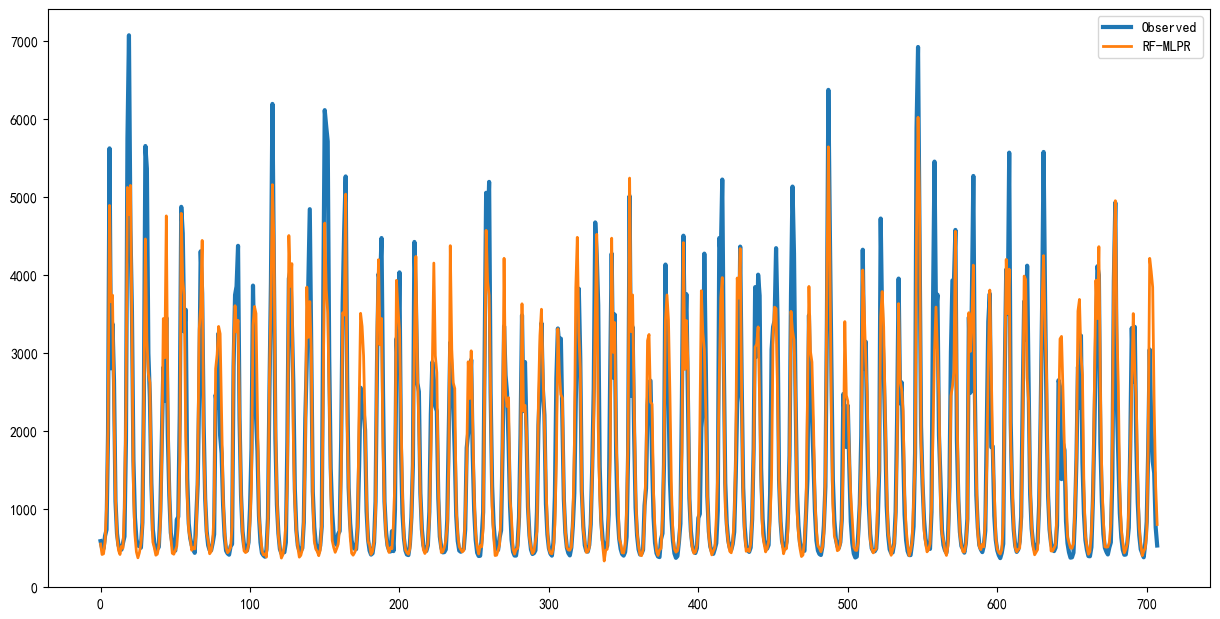

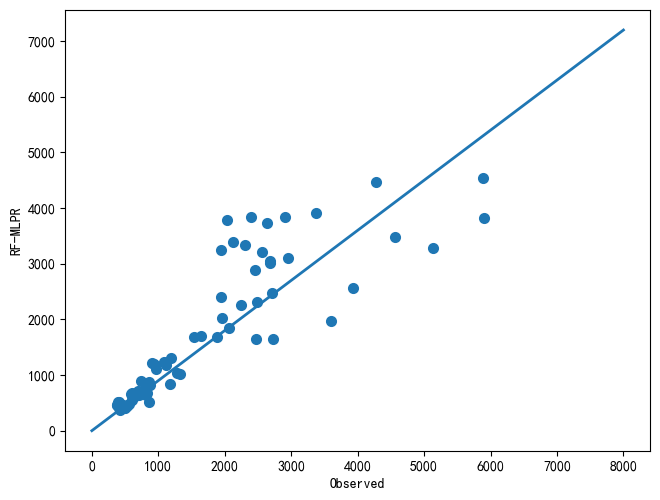

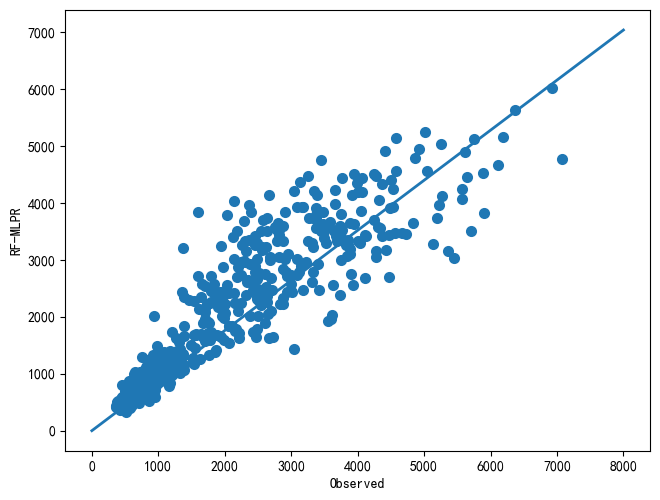

In [21]:
## MLP8预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP8=MLPRegressor()#early_stopping=True

# MLP8param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005,0.001]}
# ]

MLP8param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0005]}]
# ,(256,128,32,16,1),(256,128,64,32,16,8,1),0.0007,0.001

# MLP8 = MLP8Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X8_train,X8_test,y8_train,y8_test=train_test_split(MMrX4,df_y4,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP8=cross_validate(estimator=MLP8, X1_train,y8_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP8=GridSearchCV(estimator=MLP8, param_grid=MLP8param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP8.fit(X8_train,y8_train)
print(grid_MLP8.best_score_, grid_MLP8.best_params_)
# grid_MLP8.score(X8_train,y8_train),grid_MLP8.score(X8_test,y8_test)
mlp_pred8_train = grid_MLP8.predict(X8_train)
mlp_pred8_test = grid_MLP8.predict(X8_test)

print(f'训练集mse: {mean_squared_error(y8_train,mlp_pred8_train)},训练集r2_score: {r2_score(y8_train,mlp_pred8_train)}')
print(f'训练集mae: {mean_absolute_error(y8_train,mlp_pred8_train)},训练集mape: {mean_absolute_percentage_error(y8_train,mlp_pred8_train)}')
print(f'训练集msle: {msle(y8_train,mlp_pred8_train)}')
      
print(f'测试集mse: {mean_squared_error(y8_test,mlp_pred8_test)},测试集r2_score: {r2_score(y8_test,mlp_pred8_test)}')
print(f'测试集mae: {mean_absolute_error(y8_test,mlp_pred8_test)},测试集mape: {mean_absolute_percentage_error(y8_test,mlp_pred8_test)}')
print(f'测试集msle: {msle(y8_test,mlp_pred8_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred8=np.concatenate([mlp_pred8_train,mlp_pred8_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred8=grid_MLP8.predict(MMrX4)

# print(mlp_pred8.shape,mlp_pred8)
# print(type(mlp_pred8))#<class 'numpy.ndarray'>
# print(mlp_pred8)
np.savetxt('mlp_pred8_y1.csv', mlp_pred8, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('mlp_pred8_y11.csv', mlp_pred8, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx80=range(0,len(y8_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx80,y8_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx80,mlp_pred8_test,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx80,y8_test,label="Observed",linewidth=2) 
plt.plot(xx80,mlp_pred8_test,label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y41test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx81=range(0,len(df_y4))
plt.figure(figsize=(12,6))
# plt.scatter(xx81,df_y4,color="red",label="Observed",linewidth=3) 
# plt.plot(xx81,mlp_pred8,color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx81,df_y4,label="Observed",linewidth=3) 
plt.plot(xx81,mlp_pred8,label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y41full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a80=np.arange(8000)
a81=a80*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y8_test,mlp_pred8_test,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y41_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(8000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y4,mlp_pred8,linewidth=2) 
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y41_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

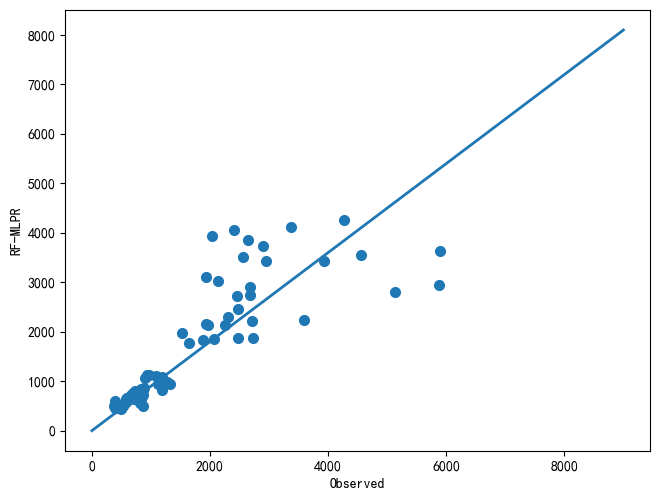

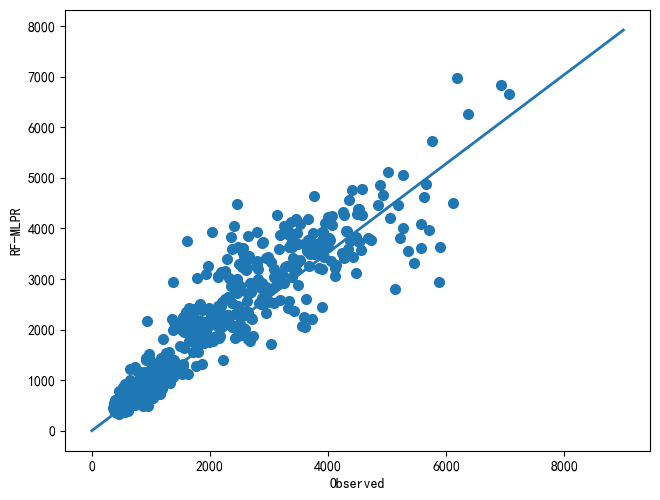

In [25]:
#测试集数据画回归图
a80=np.arange(9000)
a81=a80*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y8_test,mlp_pred8_test,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y42_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(9000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y4,mlp_pred8,linewidth=2) 
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\RF_MLP_y42_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
# plt.savefig('/home/user/myplot.png', figsize=(6,4), dpi=300, cmap='gray')
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y7_test))
plt.figure(figsize=(8,6))
plt.scatter(xx,y7_test,color="red",label="Observed",linewidth=3) 
plt.plot(xx,pred7_test,color="orange",label="RF-MLP",linewidth=2)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y32.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
# plt.savefig('/home/user/myplot.png', figsize=(6,4), dpi=300, cmap='gray')
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y7_test))
plt.figure(figsize=(8,6))
plt.scatter(xx,y7_test,color="red",label="True Point",linewidth=3) 
plt.plot(xx,pred7_test,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y3.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
# plt.savefig('/home/user/myplot.png', figsize=(6,4), dpi=300, cmap='gray')
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y7_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx,y7_test,color="red",label="True Point",linewidth=3) 
plt.plot(xx,y7_test,color="red",ls='-.',label="True Runoff",linewidth=3) #改成实测径流
plt.plot(xx,pred7_test,color="orange",label="Predict Runoff",linewidth=2) #改成预测径流
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y31.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# f, ax= plt.subplots(figsize = (26, 30))#26,30分别表示宽和高
f, ax= plt.subplots(figsize = (10, 16))
# corr = data.corr()
# print(corr)

# # 因为后面的sns.heatmap无法把字符串转化成float类型，所以以下两句把含有字符的列先去掉。
# df_delay_corr1=df_delay_corr1.iloc[:,1:]
# df_delay_corr1

#下面依据本应该使用（此处不用而已）
# sns.heatmap(df_delay_corr1,cmap='Reds', linewidths = 0.05, ax = ax, annot=False)#如果annot=False则方格内没字；默认是False.
 
# 设置Axes的标题
# ax.set_title('Correlation between features')
ax.set_title('Correlation between different lag periods')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)# 旋转轴刻度上文字方向45度。
plt.show()
plt.close()
# f.savefig('sns_style_origin1.jpg', dpi=500, bbox_inches='tight')#设置bbox_inches=’tight’，保存的图片则不会出现部分内容显示不全的现象

In [ ]:
# plt.savefig('/home/user/myplot.png', figsize=(6,4), dpi=300, cmap='gray')
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y8_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx,y7_test,color="red",label="True Point",linewidth=3) 
plt.plot(xx,y8_test,color="red",ls='-.',label="True Runoff",linewidth=3) #改成实测径流
plt.plot(xx,pred8_test,color="orange",label="Predict Runoff",linewidth=2) #改成预测径流
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y4.tif', dpi=200, transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
# ## 可视化损失函数
# plt.figure()
# plt.plot(grid_mlp.loss_curve_)
# plt.xlabel("iters")
# plt.ylabel(grid_mlp.loss)
# plt.show()


In [ ]:
## MLP预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error

MLP=MLPRegressor()

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组

crv_mlp=cross_validate(MLP, X1_train,y1_train, scoring=('r2', 'neg_mean_squared_log_error'), cv=kfold,return_estimator=True)
# estimators = crv_results['estimator']
# print(sorted(crv_mlp.keys()))
# print(crv_mlp['test_neg_mean_squared_log_error'])
# print(crv_mlp['train_r2'])

# # grid2=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)

# print ("fitting model right now")
# grid_mlp.fit(X1_train,y1_train)
# print(grid_mlp.best_score_, grid_mlp.best_params_)

# pred1_train = grid_mlp.predict(X1_train)
# '''计算训练集 MSE'''
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# mse_1 = mean_squared_error(pred1_train,y1_train)
# mae_1 = mean_absolute_error(pred1_train,y1_train)
# print ("Train MSE ERROR = ", mse_1)
# print ("Train MAE ERROR = ", mae_1)
# '''计算测试集mse'''
# pred1_test = grid_mlp.predict(X1_test)
# mse_2 = mean_squared_error(pred1_test,y1_test)
# mae_2 = mean_absolute_error(pred1_test,y1_test)
# print ("Test MSE ERROR = ", mse_2)
# print ("Test MAE ERROR = ", mae_2)


# print(grid_mlp.best_score_, grid_mlp.best_params_)
# print(f'测试集 MAE:{mean_absolute_error(y1_test,pred1_test)}')
# print(f'测试集 RMSE:{np.sqrt(mean_squared_error(y1_test,pred1_test))}')
# print(f'测试集 r2_score:{r2_score(y1_test,pred1_test)}')

 
# '''结果可视化'''
# import matplotlib.pyplot as plt
# xx=range(0,len(y1_test))
# plt.figure(figsize=(8,6))
# plt.scatter(xx,y1_test,color="red",label="Sample Point",linewidth=3) 
# plt.plot(xx,pred1_test,color="orange",label="Fitting Line",linewidth=2)
# plt.legend()
# plt.show()

In [ ]:
estimators = crv_mlp['estimator']
print(sorted(crv_mlp.keys()))
print(crv_mlp['test_neg_mean_squared_log_error'])
print(estimators)

In [ ]:
y1_predt=estimators.predict(X1_test)
print(r2_score(y1_predt,y1_test))

In [ ]:
print(sorted(crv_mlp.keys()))
print(crv_mlp['test_neg_mean_squared_error'])

In [ ]:
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y1_test))
plt.figure(figsize=(8,6))
plt.scatter(xx,y1_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,mlp_pred1_test,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
xx=range(0,len(y1_test))
plt.figure(figsize=(8,6))
plt.scatter(xx,y1_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred1_test,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [ ]:
svrt=SVR()
svrt.fit(X_train,y1_train)
print(svrt.score(X_train,y1_train))
y_predt=svrt.predict(X_test)
print('r2_score:',r2_score(y1_test,y_predt))
print(f'mae:{mean_absolute_error(MMy1Scaler.inverse_transform(y1_test.reshape(-1,1)),MMy1Scaler.inverse_transform(y_predt.reshape(-1,1)))}')
print(f'mse:{mean_squared_error(MMy1Scaler.inverse_transform(y1_test.reshape(-1,1)),MMy1Scaler.inverse_transform(y_predt.reshape(-1,1)))}')

In [ ]:
import numpy as np

#type(y1_test) #输出是'DataFrame' object has no attribute 'reshape'
# type(np.array(y1_test))
y1_test=np.array(y1_test)

print(f'mae:{mean_absolute_error(MMy1Scaler.inverse_transform(y1_test.reshape(-1,1)),MMy1Scaler.inverse_transform(y1_pred.reshape(-1,1)))}')
print(f'mse:{mean_squared_error(MMy1Scaler.inverse_transform(y1_test.reshape(-1,1)),MMy1Scaler.inverse_transform(y1_pred.reshape(-1,1)))}')

In [ ]:
MMy1Scaler.inverse_transform(y1_pred.reshape(-1,1)).shape

In [ ]:
y1_test.shape

In [ ]:
import numpy as np
type(np.array(y1_test))

In [ ]:
type(y1_pred)

In [ ]:
df_y1.shape

In [ ]:
grid_param1=[
    {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],'epsilon':[0.01,0.1,1,10]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],'epsilon':[0.01,0.1,1,10]},
    {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],'epsilon':[0.01,0.1,1,10]},
]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以虾米的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
grid2=GridSearchCV(SVR(), grid_param1, cv=kfold,)

grid2.fit(X_train,y1_train)
print(f'最佳测试集分数：{grid2.best_score_},最佳参数为：{grid2.best_params_}')

In [ ]:
# -*- coding: utf-8 -*-
#--------------------------
#from sklearn.neural_network import MLPClassifier #用于多分类的情况
#SciKit-learn库 可以创建神经网络
#MLP是多层感知器，使用的是前馈神经网络
#只支持交叉熵损失，使用mlp.predict_proda()，最小化交叉熵，同时给似然估计p(y|x)
#支持多分类使用softmax
#mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)
#mlp.fit(xtrain, ytrain)
#--------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
a = np.loadtxt("./test.txt")
scaler = preprocessing.StandardScaler().fit(a)
a = scaler.transform(a)
#print(a.shape) #get value from txt
x = a[:,0] #get the first column from a
y = a[:,1] ##get the second column from a
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train
y_test = y_test
# alpha:L2的参数：MLP是可以支持正则化的，默认为L2，具体参数需要调整
# hidden_layer_sizes=(5, 2) hidden层2层,第一层5个神经元，第二层2个神经元)，2层隐藏层，也就有3层神经网络
#clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#'identity'，无操作**，对实现线性瓶颈很有用，返回f（x）= x
#'logistic'，logistic sigmoid函数，返回f（x）= 1 /（1 + exp（-x））。
#'tanh'，双曲tan函数，返回f（x）= tanh（x）。
#'relu'，整流后的线性单位函数，返回f（x）= max（0，x）
model_mlp = MLPRegressor(
    hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_mlp.fit(X_train, y_train)
import time
import datetime
startTime = time.time()
x1 = x.reshape(-1,1)
mlp_score=model_mlp.score(x1,y)
print('sklearn多层感知器-回归模型得分',mlp_score)#预测正确/总数
result = model_mlp.predict(x1)
stopTime = time.time()
sumTime = stopTime - startTime
print('总时间是：', sumTime)
# inp = [[ele] for ele in X_train]
# pre = clf.predict(inp)
# #print(pre)
plt.plot(X_train, y_train, 'bo')
plt.plot(x1, result, 'ro')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
## 定义含有4个隐藏层的MLP网络
mlpr = MLPRegressor(hidden_layer_sizes=(1000,1000,300,100), ## 隐藏层的神经元个数
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=100, 
                    random_state=123,
#                     early_stopping=True, ## 是否提前停止训练
#                     validation_fraction=0.2, ## 20%作为验证集
#                     tol=1e-8,
                   )

## 拟合训练数据集
mlpr.fit(X_train,y_train)

## 可视化损失函数
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()

In [ ]:
import math

sqrt1=math.sqrt
sqrt1(9)

In [ ]:
sqrt1([25,9],[36,100])

In [ ]:
r2_score([5,6],[6,5])

## MLPRegressor示例

In [ ]:
'''载入数据'''
from sklearn import datasets

#由于boston房价已经不能直接从sklearn中调用了，所以使用一下方法
# boston = datasets.load_boston()
# x,y = boston.data,boston.target

#由于boston房价已经不能直接从sklearn中调用了，所以使用一下方法
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]



'''引入标准化函数'''
from sklearn import preprocessing
x_MinMax = preprocessing.MinMaxScaler()
y_MinMax = preprocessing.MinMaxScaler()
 
''' 将 y 转换成 列 '''
import numpy as np
y = np.array(y).reshape(len(y),1)

'''标准化'''
x = x_MinMax.fit_transform(x)
y = y_MinMax.fit_transform(y)
 
''' 按二八原则划分训练集和测试集 '''
from sklearn.model_selection import train_test_split
np.random.seed(2019)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
 
'''模型构建'''
from sklearn.neural_network import MLPRegressor
fit1 = MLPRegressor(
    hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
    alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''
print ("fitting model right now")
fit1.fit(x_train,y_train)
pred1_train = fit1.predict(x_train)
'''计算训练集 MSE'''
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(pred1_train,y_train)
print ("Train ERROR = ", mse_1)
'''计算测试集mse'''
pred1_test = fit1.predict(x_test)
mse_2 = mean_squared_error(pred1_test,y_test)
print ("Test ERROR = ", mse_2)
 
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y_test))
plt.figure(figsize=(8,6))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=3) 
plt.plot(xx,pred1_test,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [101]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import make_scorer

from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(15.0,8.0)
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
# plt.rcParams['font.family']='simhei'
# plt.rcParams['font.family']=['sans-serif']
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示

# from matplotlib.font_manager import FontProperties
# fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import warnings

# df=pd.read_excel(r'..\data\雅砻江MinMax归一化后.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江原始值.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江数据去除缺失值.xlsx')
# df1=pd.read_excel(r'..\data\88项环流指数.xlsx')

df_y10=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred1_y10.csv',header=None)
df_y20=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred2_y20.csv',header=None)
df_y30=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred3_y30.csv',header=None)
df_y40=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred4_y40.csv',header=None)

In [ ]:
import numpy as np

# np.std()默认计算的为总体标准偏差，即ddof=0；一般在拥有所有数据的情况下，计算所有数据的标准差时使用，即最终除以n，而非n-1；
# pd.std()计算的为样本标准偏差，ddof=1，无偏估计；一般在只有部分数据，但需要求得总体的标准差时使用，当只有部分数据时，根据统计规律，除以n时计算的标准差往往偏小，因此需要除以n-1，即n-ddof；实际使用时需要注意，并且根据数据情况选择合适的函数，在数据量较大时，推荐使用numpy进行计算。

# 假设有一组数据
data = np.array([1, 2, 3, 4, 5])

# 计算标准差
std_dev = np.std(data, ddof=0)  # ddof=0对于整个数据集的总体标准差，即分母是n;ddof=1表示样本方差分母是n-1，即无偏估计；.
std_dev_sample = np.std(data, ddof=1)  # 对于样本的标准差

import numpy as np

# 假设有两组数据
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([2, 3, 4, 5, 6])

# 计算两组数据之间的皮尔逊相关系数
correlation = np.corrcoef(data1, data2)[0, 1]

In [102]:
df_y40.head()

0           1
0  583.0  593.030014
1  495.0  483.588097
2  487.0  445.318270
3  650.0  633.275322
4  730.0  822.195064

In [103]:
df_y40.iloc[:,1]

0       593.030014
1       483.588097
2       445.318270
3       633.275322
4       822.195064
          ...     
703    2942.626544
704    2813.075367
705    1755.683190
706     928.843341
707     621.161132
Name: 1, Length: 708, dtype: float64

In [104]:
print(f'测试集mse: {mean_squared_error(df_y10.iloc[:,0],df_y10.iloc[:,1])},测试集r2_score: {r2_score(df_y10.iloc[:,0],df_y10.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y10.iloc[:,0],df_y10.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y10.iloc[:,0],df_y10.iloc[:,1])}')
print(f'测试集msle: {msle(df_y10.iloc[:,0],df_y10.iloc[:,1])}')

测试集mse: 14051.908932703876,测试集r2_score: 0.954281539938775
测试集mae: 72.60255503474576,测试集mape: 0.12541096707278465
测试集msle: 0.02214212234333777


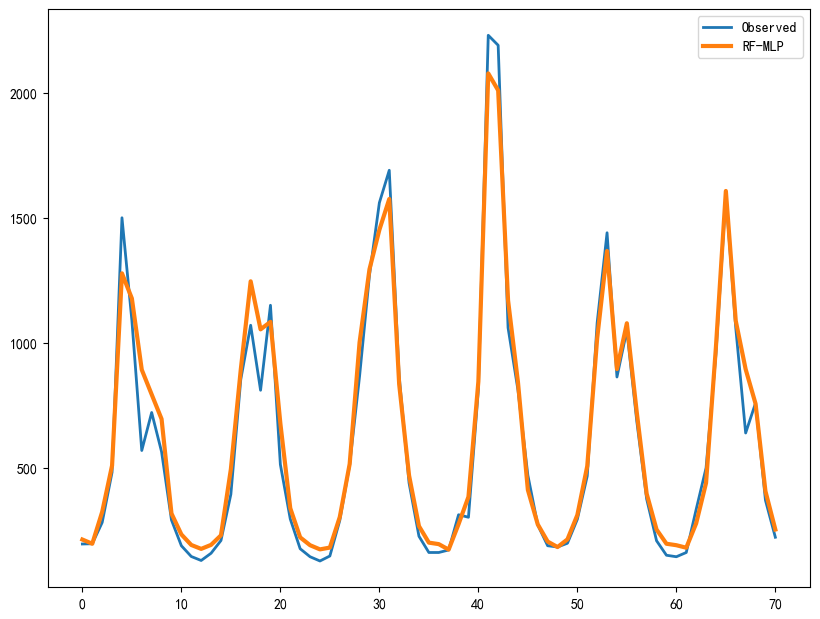

In [105]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx90=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx90,df_y10.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx90,df_y10.iloc[-71:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx90,df_y10.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx90,df_y10.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y91test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

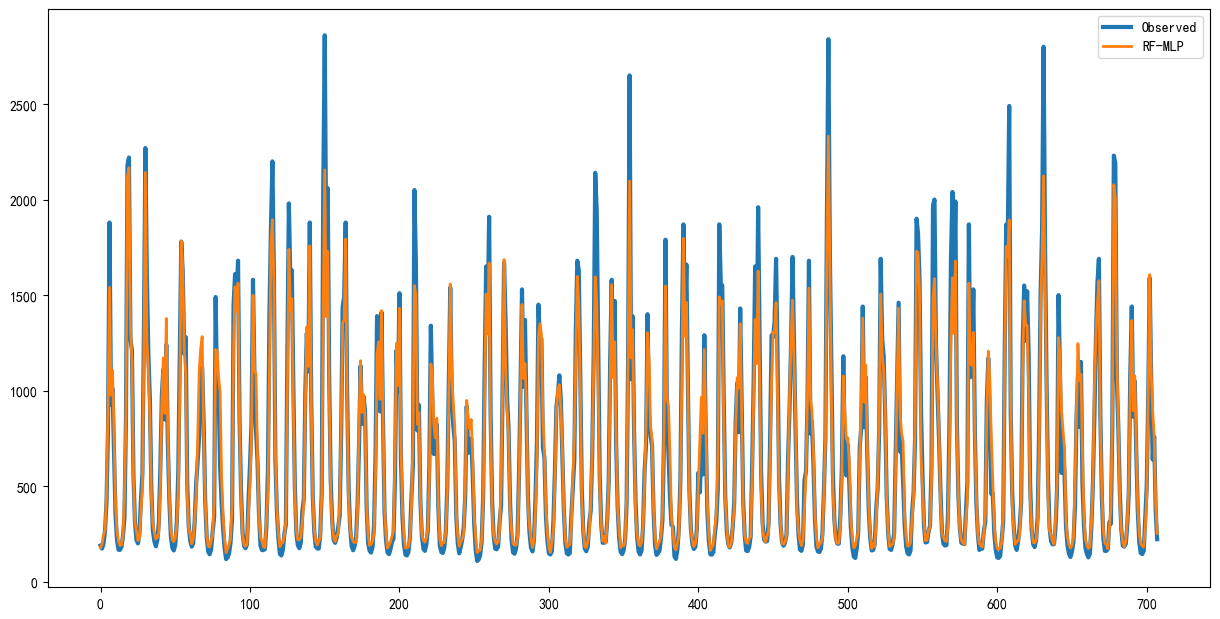

In [106]:
#全部数据画图
xx91=range(0,len(df_y10.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx91,df_y10.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx91,df_y10.iloc[:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx91,df_y10.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx91,df_y10.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y91full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

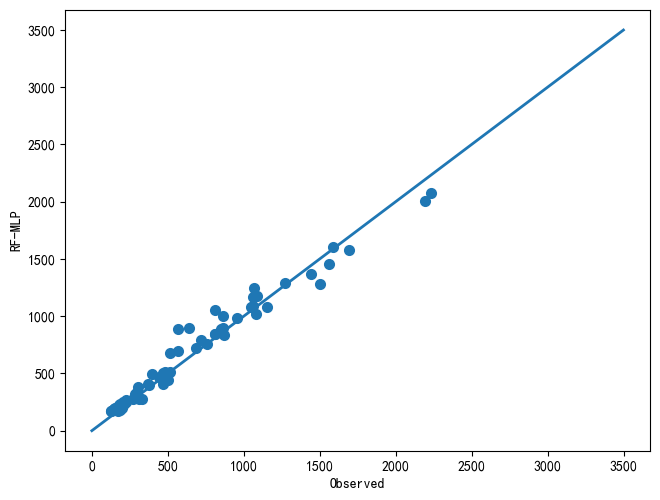

In [107]:
#测试集数据画回归图
a90=np.arange(3500)
a91=a90
# plt.scatter(df_y10.iloc[-71:,0],df_y10.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y10.iloc[-71:,0],df_y10.iloc[-71:,1],linewidth=2) 
plt.plot(a90,a91,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y9_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

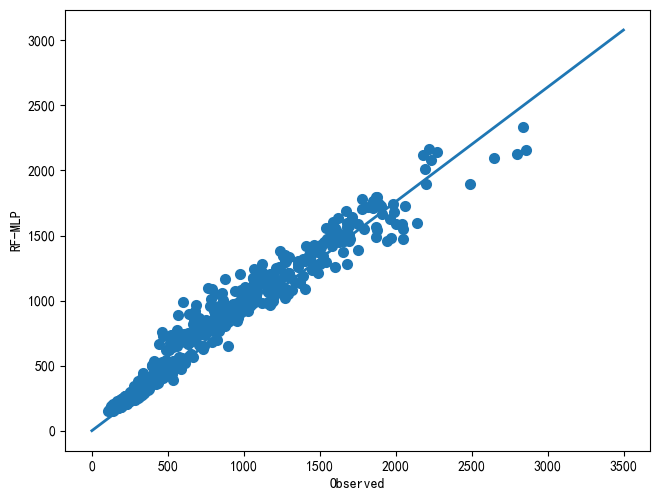

In [108]:
#所有数据画回归图
a92=np.arange(3500)
a93=a92*0.88
# plt.scatter(df_y10.iloc[:,0],df_y10.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y10.iloc[:,0],df_y10.iloc[:,1],linewidth=2) 
plt.plot(a92,a93,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y9_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [109]:
print(f'测试集mse: {mean_squared_error(df_y20.iloc[:,0],df_y20.iloc[:,1])},测试集r2_score: {r2_score(df_y20.iloc[:,0],df_y20.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y20.iloc[:,0],df_y20.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y20.iloc[:,0],df_y20.iloc[:,1])}')
print(f'测试集msle: {msle(df_y20.iloc[:,0],df_y20.iloc[:,1])}')

测试集mse: 45089.9068241539,测试集r2_score: 0.958433166418312
测试集mae: 129.9934928918079,测试集mape: 0.11589618929642834
测试集msle: 0.01914558147151406


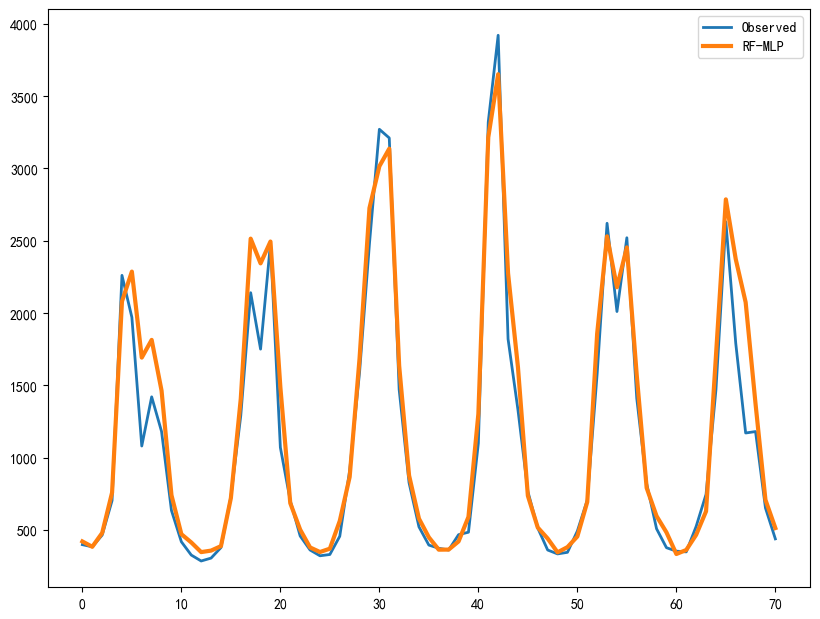

In [110]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx100=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx100,df_y20.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx100,df_y20.iloc[-71:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx100,df_y20.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx100,df_y20.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y101test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

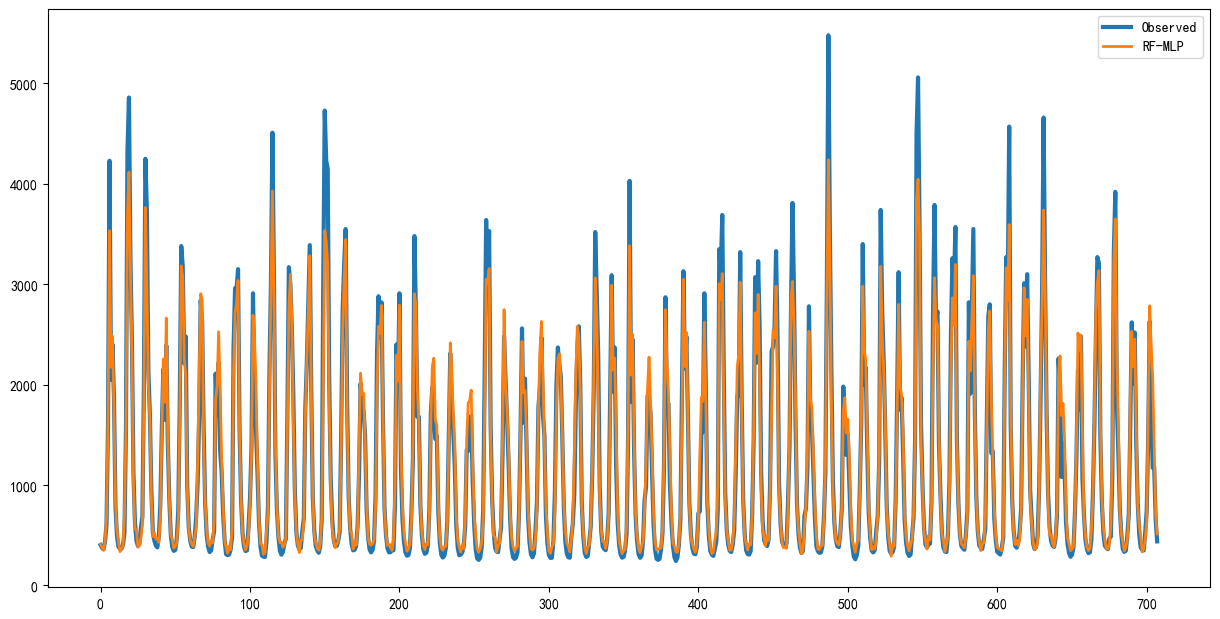

In [111]:
#全部数据画图
xx101=range(0,len(df_y20.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx101,df_y20.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx101,df_y20.iloc[:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx101,df_y20.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx101,df_y20.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y101full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

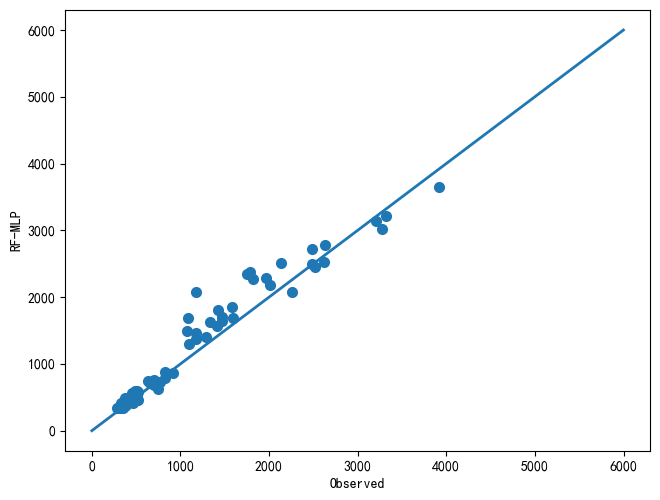

In [112]:
#测试集数据画回归图
a100=np.arange(6000)
a101=a100
# plt.scatter(df_y20.iloc[-71:,0],df_y20.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y20.iloc[-71:,0],df_y20.iloc[-71:,1],linewidth=2) 
plt.plot(a100,a101,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y10_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

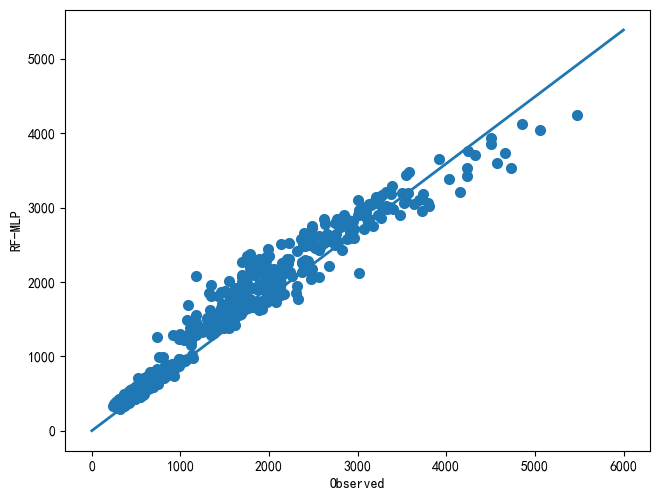

In [113]:
#所有数据画回归图
a102=np.arange(6000)
a103=a102*0.898
# plt.scatter(df_y20.iloc[:,0],df_y20.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y20.iloc[:,0],df_y20.iloc[:,1],linewidth=2) 
plt.plot(a102,a103,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y10_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [114]:
print(f'测试集mse: {mean_squared_error(df_y30.iloc[:,0],df_y30.iloc[:,1])},测试集r2_score: {r2_score(df_y30.iloc[:,0],df_y30.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y30.iloc[:,0],df_y30.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y30.iloc[:,0],df_y30.iloc[:,1])}')
print(f'测试集msle: {msle(df_y30.iloc[:,0],df_y30.iloc[:,1])}')

测试集mse: 63879.57601499165,测试集r2_score: 0.9553754267422426
测试集mae: 154.2457219838983,测试集mape: 0.11450634430373233
测试集msle: 0.018858677883482534


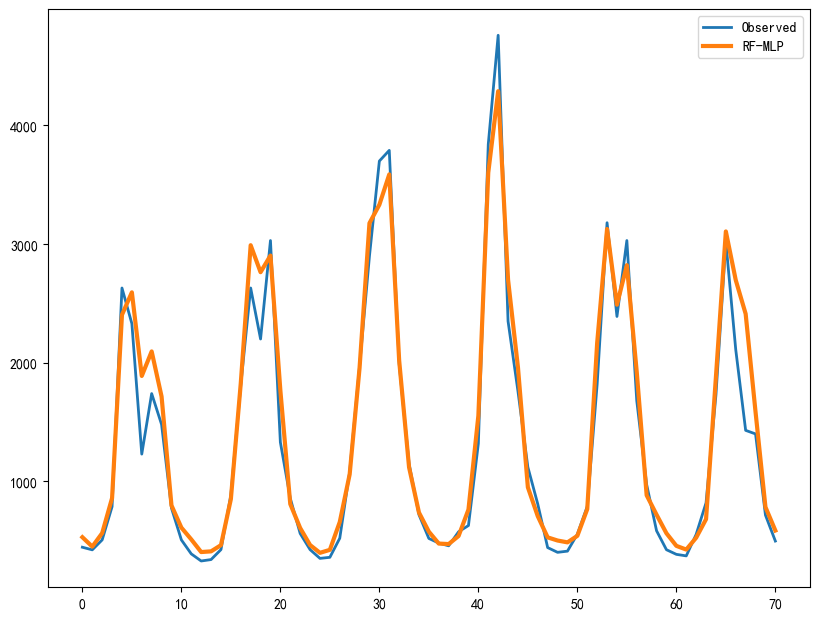

In [115]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx110=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx110,df_y30.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx110,df_y30.iloc[-71:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx110,df_y30.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx110,df_y30.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y111test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

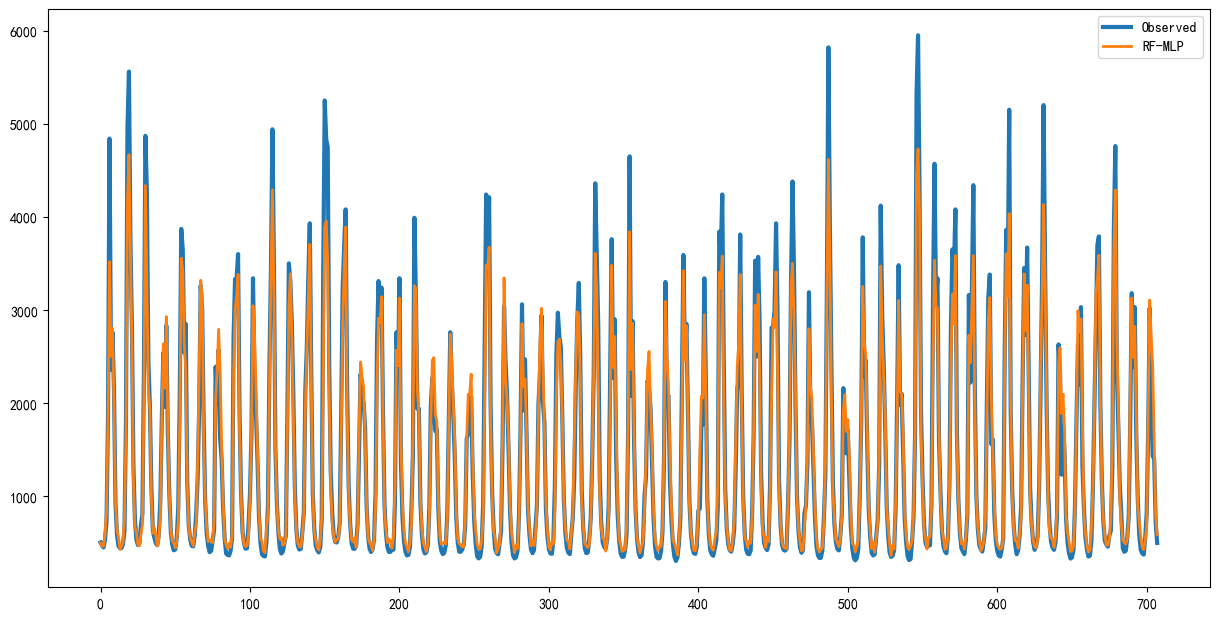

In [116]:
#全部数据画图
xx111=range(0,len(df_y30.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx111,df_y30.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx111,df_y30.iloc[:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx111,df_y30.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx111,df_y30.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y111full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

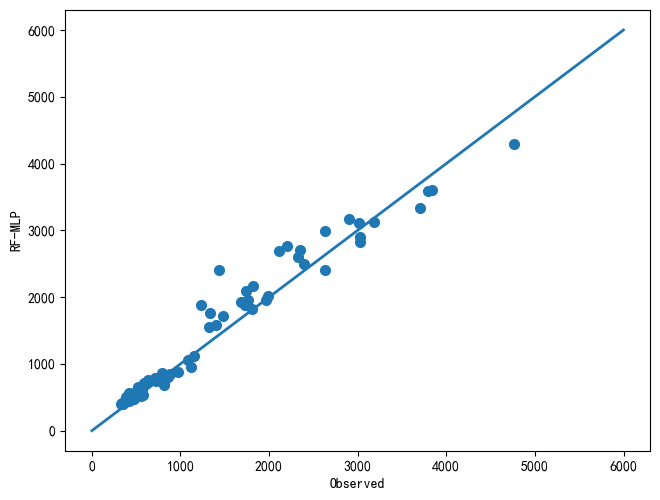

In [117]:
#测试集数据画回归图
a110=np.arange(6000)
a111=a110
# plt.scatter(df_y30.iloc[-71:,0],df_y30.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y30.iloc[-71:,0],df_y30.iloc[-71:,1],linewidth=2) 
plt.plot(a110,a111,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y30_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

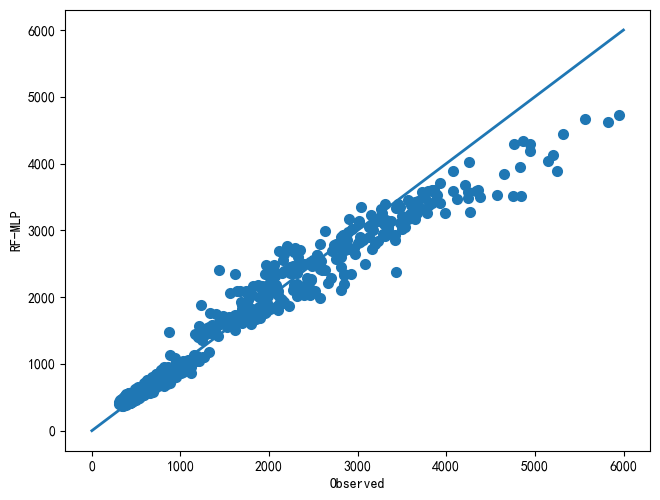

In [118]:
#所有数据画回归图
a112=np.arange(6000)
a113=a112
# plt.scatter(df_y30.iloc[:,0],df_y30.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y30.iloc[:,0],df_y30.iloc[:,1],linewidth=2) 
plt.plot(a112,a113,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y30_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [119]:
print(f'测试集mse: {mean_squared_error(df_y40.iloc[:,0],df_y40.iloc[:,1])},测试集r2_score: {r2_score(df_y40.iloc[:,0],df_y40.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y40.iloc[:,0],df_y40.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y40.iloc[:,0],df_y40.iloc[:,1])}')
print(f'测试集msle: {msle(df_y40.iloc[:,0],df_y40.iloc[:,1])}')

测试集mse: 78313.2752555238,测试集r2_score: 0.9599708108148574
测试集mae: 160.86584336129943,测试集mape: 0.09525463685047814
测试集msle: 0.013960185490737981


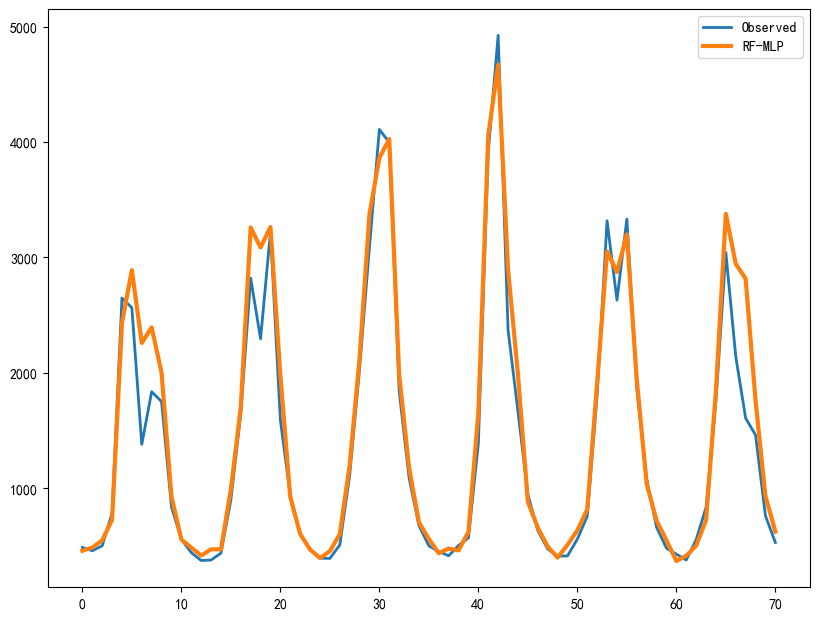

In [120]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx120=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx120,df_y40.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx120,df_y40.iloc[-71:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx120,df_y40.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx120,df_y40.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y121test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

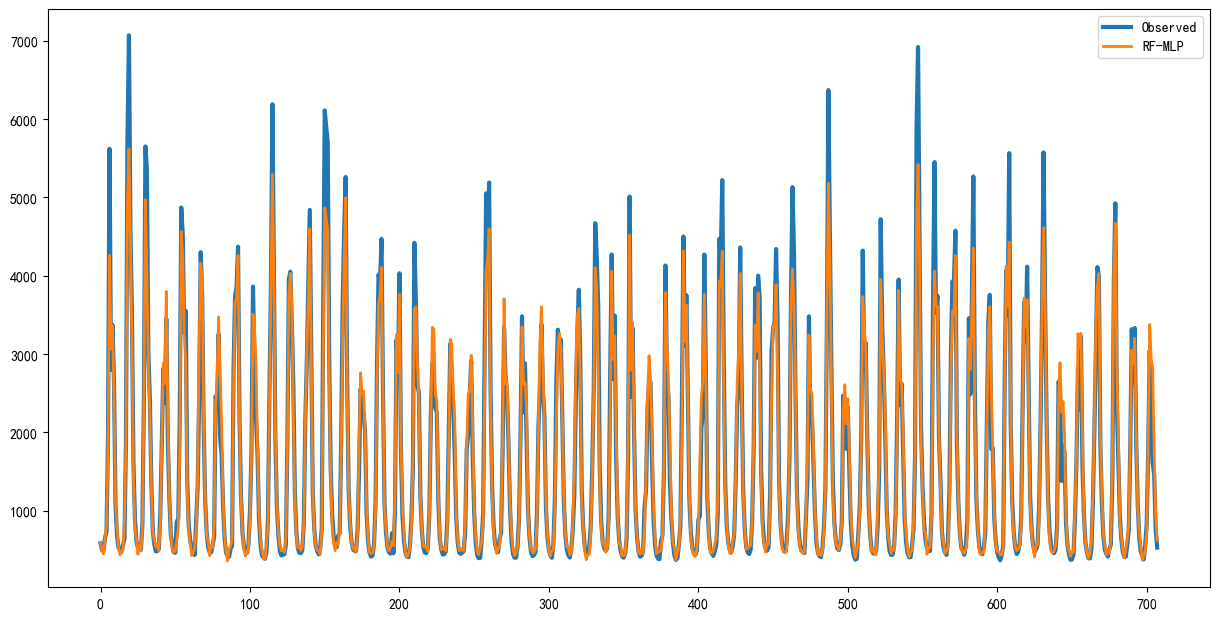

In [121]:
#全部数据画图
xx121=range(0,len(df_y40.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx121,df_y40.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx121,df_y40.iloc[:,1],color="orange",label="RF-MLPR",linewidth=2)
plt.plot(xx121,df_y40.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx121,df_y40.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y121full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

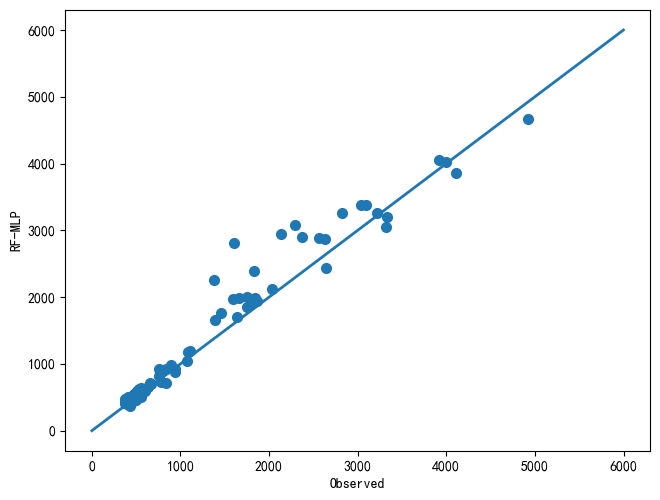

In [122]:
#测试集数据画回归图
a120=np.arange(6000)
a121=a120
# plt.scatter(df_y40.iloc[-71:,0],df_y40.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y40.iloc[-71:,0],df_y40.iloc[-71:,1],linewidth=2) 
plt.plot(a120,a121,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y40_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

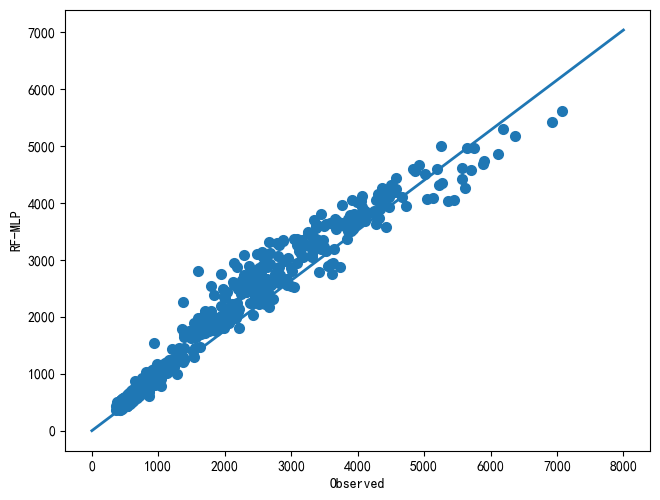

In [123]:
#所有数据画回归图
a122=np.arange(8000)
a123=a122*0.88
# plt.scatter(df_y40.iloc[:,0],df_y40.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y40.iloc[:,0],df_y40.iloc[:,1],linewidth=2) 
plt.plot(a122,a123,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\MLP_y40_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()